In [11]:
import pandas as pd
import json
import gzip
from tqdm import tqdm

def load_json_lines(file_path, sample_size=None):
    data = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:  # use gzip.open with 'rt' (read text)
        for i, line in tqdm(enumerate(f)):
            if sample_size and i >= sample_size:
                break
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Correct path to your .gz file
df = load_json_lines(r'C:\Users\Varshith M Gowda\Desktop\DATATHON\Electronics_5.json.gz', sample_size=2000000)
pd.set_option('display.max_columns',None)
filtered_df = df[df['asin'] == 'B003L1ZYYW']

# Print number of matching rows
print("Number of rows where asin = 'B003L1ZYYW':", filtered_df.shape[0])


2000000it [00:30, 65957.03it/s]


Number of rows where asin = 'B003L1ZYYW': 8612


In [12]:
df.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [5]:
import pandas as pd
import json
import gzip
from tqdm import tqdm

# Load JSON lines from a .gz file
def load_json_lines(file_path, sample_size=None):
    data = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for i, line in tqdm(enumerate(f)):
            if sample_size and i >= sample_size:
                break
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Load the dataset (adjust sample_size as needed)
df = load_json_lines(r'C:\Users\Varshith M Gowda\Desktop\DATATHON\Electronics_5.json.gz', sample_size=2000000)

# Show all columns in output
pd.set_option('display.max_columns', None)

# Filter reviews for the specific product
filtered_df = df[df['asin'] == 'B003L1ZYYW']

# Print number of matching reviews
print("Total reviews for ASIN 'B003L1ZYYW':", filtered_df.shape[0])

# Classify sentiment based on 'overall' rating
positive_reviews = filtered_df[filtered_df['overall'] == 5]
negative_reviews = filtered_df[filtered_df['overall'] <= 3]

print("\n✅ Number of positive reviews:", positive_reviews.shape[0])
print("❌ Number of negative reviews:", negative_reviews.shape[0])



2000000it [00:16, 118298.81it/s]


Total reviews for ASIN 'B003L1ZYYW': 8612

✅ Number of positive reviews: 7334
❌ Number of negative reviews: 336


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...


Sentiment counts: {'positive': 6993, 'negative': 1615, 'neutral': 0}


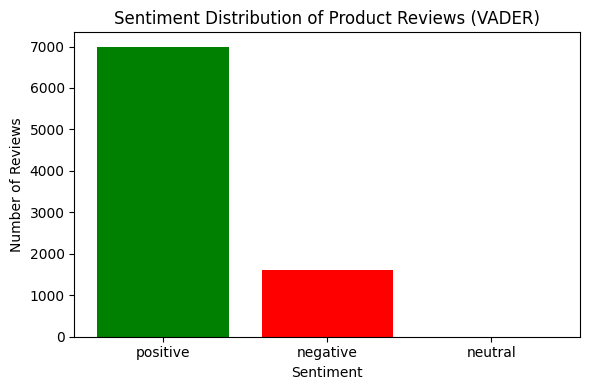

In [16]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# # Download the VADER lexicon once
# nltk.download('vader_lexicon')

# Step 1: Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r') as f:
    lines = f.readlines()

# Step 2: Parse each line to JSON
reviews = [json.loads(line) for line in lines]

# Step 3: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
extended_reviews = []
sentiment_counts = {"positive": 0, "negative": 0, "neutral": 0}

for review in reviews:
    text = review.get("reviewText", "")
    if text:
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        if compound >= 0.05:
            sentiment = 'positive'
        elif compound <= 0.05:
            sentiment = 'negative'
        # else:
        #     sentiment = 'neutral'
        
        # Append sentiment data
        review["review"] = text
        review["sentiment"] = sentiment
        review["compound_score"] = compound

        sentiment_counts[sentiment] += 1
        extended_reviews.append(review)

# # Step 4: Save to CSV with all original + new fields
# csv_file_path = "vader_sentiment_reviews.csv"
# fieldnames = list(extended_reviews[0].keys())

# with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(extended_reviews)

# print("CSV file created:", csv_file_path)
print("Sentiment counts:", sentiment_counts)

# Step 5: Plot the sentiment distribution
labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=["green", "red", "gray"])
plt.title("Sentiment Distribution of Product Reviews (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [10]:
!pip install nltk


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CSV file saved: C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv

Rating 1 stars:
  Positive reviews: 20
  Negative reviews: 34
  Neutral reviews : 16


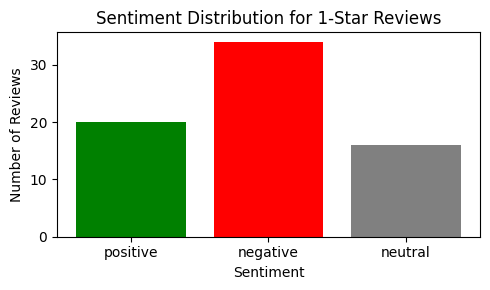


Rating 2 stars:
  Positive reviews: 26
  Negative reviews: 32
  Neutral reviews : 11


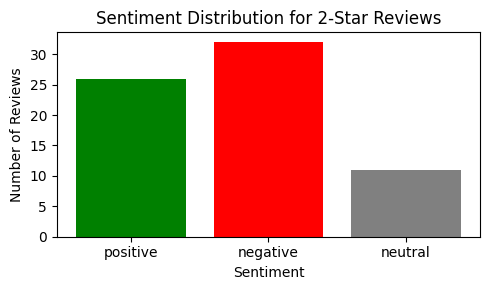


Rating 3 stars:
  Positive reviews: 93
  Negative reviews: 56
  Neutral reviews : 48


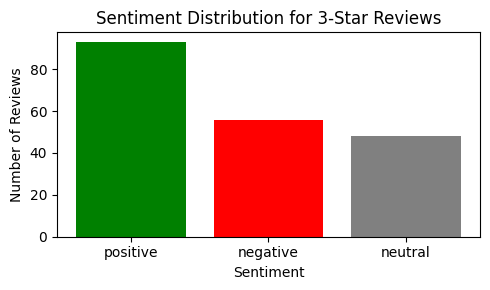


Rating 4 stars:
  Positive reviews: 727
  Negative reviews: 78
  Neutral reviews : 137


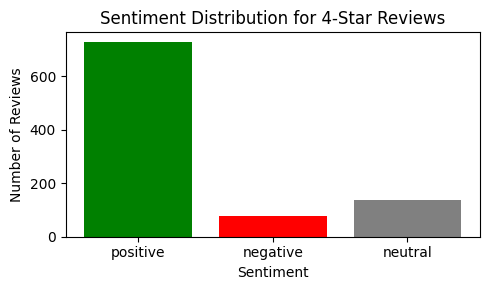


Rating 5 stars:
  Positive reviews: 6127
  Negative reviews: 456
  Neutral reviews : 747


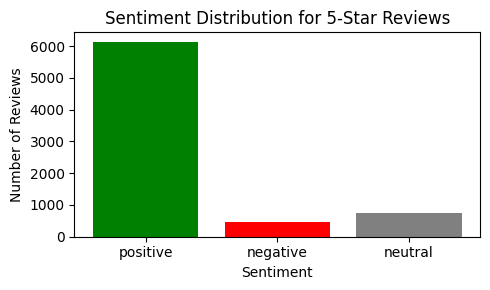

In [17]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import defaultdict

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Step 1: Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Step 2: Parse each line to JSON
reviews = [json.loads(line) for line in lines]

# Step 3: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
rating_sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0, "neutral": 0})
extended_reviews = []

for review in reviews:
    text = review.get("reviewText", "")
    rating = int(review.get("overall", 0))  # Ensure rating is int
    if text and 1 <= rating <= 5:
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        if compound >= 0.05:
            sentiment = 'positive'
        elif compound <= -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        review["sentiment"] = sentiment
        review["compound_score"] = compound
        extended_reviews.append(review)

        # Count sentiment per rating
        rating_sentiment_counts[rating][sentiment] += 1

# Optional: Save extended review data to CSV
csv_file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv"
fieldnames = list(extended_reviews[0].keys())

with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(extended_reviews)

print("CSV file saved:", csv_file_path)

# Step 4: Print and plot sentiment distribution per rating
for rating in range(1, 6):
    sentiment_data = rating_sentiment_counts[rating]
    print(f"\nRating {rating} stars:")
    print("  Positive reviews:", sentiment_data['positive'])
    print("  Negative reviews:", sentiment_data['negative'])
    print("  Neutral reviews :", sentiment_data['neutral'])

    # Bar plot for each rating
    plt.figure(figsize=(5, 3))
    plt.bar(sentiment_data.keys(), sentiment_data.values(), color=["green", "red", "gray"])
    plt.title(f"Sentiment Distribution for {rating}-Star Reviews")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CSV file saved: C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv


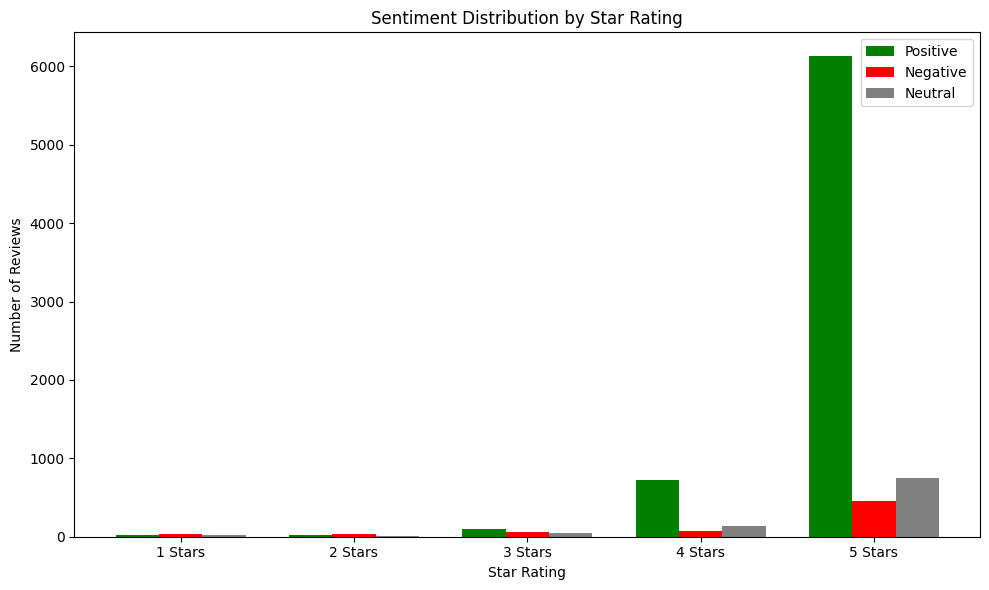

In [18]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import defaultdict
import numpy as np

# Download VADER lexicon
nltk.download('vader_lexicon')

# Step 1: Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Step 2: Parse JSON lines
reviews = [json.loads(line) for line in lines]

# Step 3: Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
rating_sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0, "neutral": 0})
extended_reviews = []

for review in reviews:
    text = review.get("reviewText", "")
    rating = int(review.get("overall", 0))
    if text and 1 <= rating <= 5:
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        if compound >= 0.05:
            sentiment = 'positive'
        elif compound <= -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        review["sentiment"] = sentiment
        review["compound_score"] = compound
        extended_reviews.append(review)

        # Count sentiment per rating
        rating_sentiment_counts[rating][sentiment] += 1

# Step 4: Save extended reviews (optional)
csv_file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv"
fieldnames = list(extended_reviews[0].keys())
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(extended_reviews)

print("CSV file saved:", csv_file_path)

# Step 5: Plot a single grouped bar chart for all ratings
ratings = range(1, 6)
sentiments = ["positive", "negative", "neutral"]
colors = {"positive": "green", "negative": "red", "neutral": "gray"}

# Get counts in the form of lists
data = {sentiment: [rating_sentiment_counts[r][sentiment] for r in ratings] for sentiment in sentiments}

x = np.arange(len(ratings))  # positions for bars
width = 0.25  # width of each bar group

plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(sentiments):
    plt.bar(x + i * width, data[sentiment], width, label=sentiment.capitalize(), color=colors[sentiment])

plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution by Star Rating")
plt.xticks(x + width, [str(r) + " Stars" for r in ratings])
plt.legend()
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CSV file saved: C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv


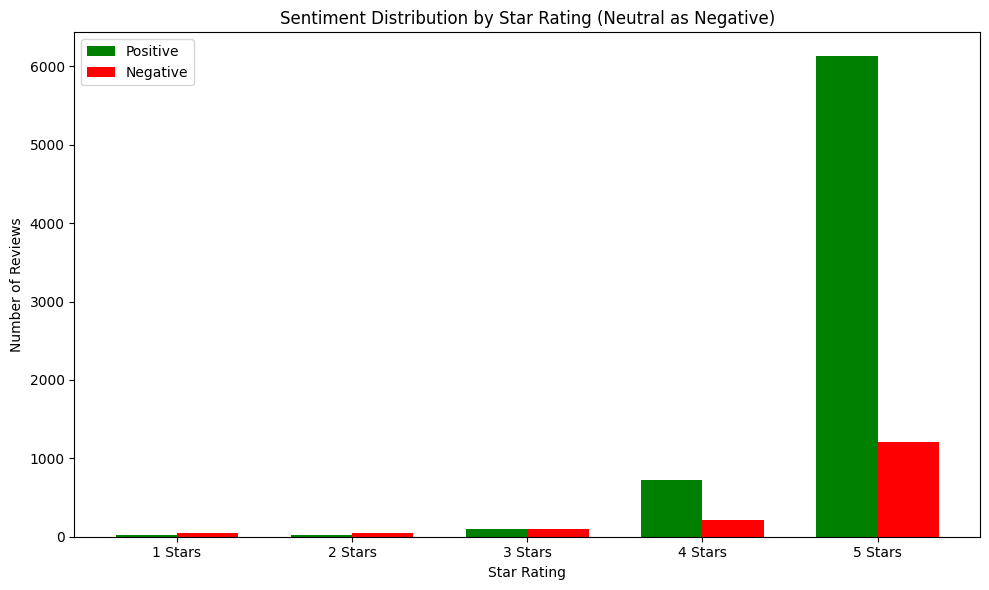

In [19]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import defaultdict
import numpy as np

# Download VADER lexicon
nltk.download('vader_lexicon')

# Step 1: Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Step 2: Parse JSON lines
reviews = [json.loads(line) for line in lines]

# Step 3: Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
rating_sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0})
extended_reviews = []

for review in reviews:
    text = review.get("reviewText", "")
    rating = int(review.get("overall", 0))
    if text and 1 <= rating <= 5:
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        # Reclassify: neutral is treated as negative
        if compound >= 0.05:
            sentiment = 'positive'
        else:
            sentiment = 'negative'

        review["sentiment"] = sentiment
        review["compound_score"] = compound
        extended_reviews.append(review)

        # Count sentiment per rating
        rating_sentiment_counts[rating][sentiment] += 1

# Step 4: Save extended reviews (optional)
csv_file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_reviews_by_rating.csv"
fieldnames = list(extended_reviews[0].keys())
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(extended_reviews)

print("CSV file saved:", csv_file_path)

# Step 5: Plot a single grouped bar chart for all ratings
ratings = range(1, 6)
sentiments = ["positive", "negative"]
colors = {"positive": "green", "negative": "red"}

# Get counts in the form of lists
data = {sentiment: [rating_sentiment_counts[r][sentiment] for r in ratings] for sentiment in sentiments}

x = np.arange(len(ratings))  # positions for bars
width = 0.35  # width of each bar group

plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(sentiments):
    plt.bar(x + i * width, data[sentiment], width, label=sentiment.capitalize(), color=colors[sentiment])

plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution by Star Rating (Neutral as Negative)")
plt.xticks(x + width / 2, [str(r) + " Stars" for r in ratings])
plt.legend()
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


CSV file saved: C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_by_rating_clean.csv


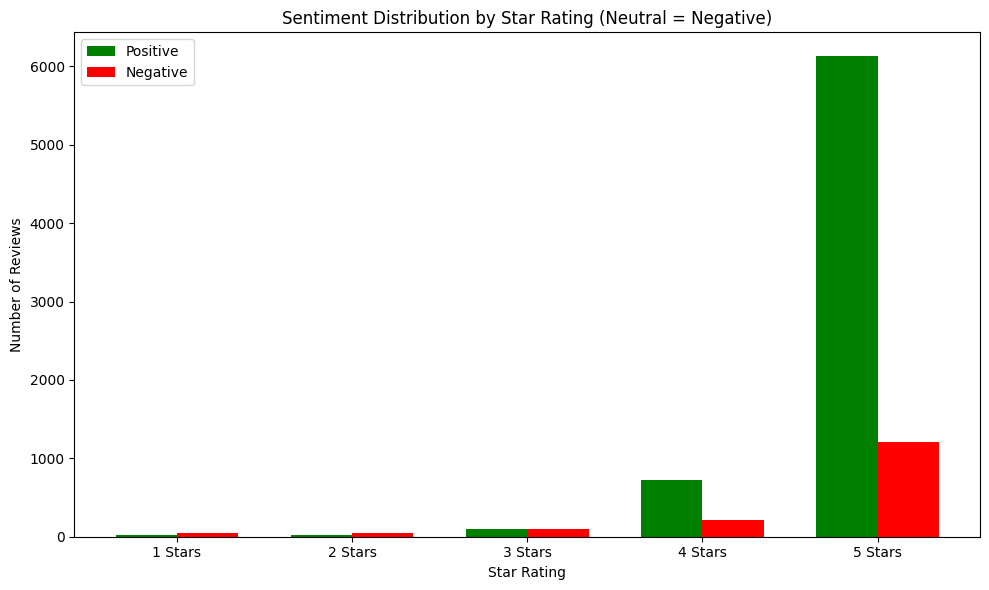

In [20]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import defaultdict
import numpy as np
import os

# Ensure VADER is available
nltk.download('vader_lexicon')

def load_reviews(file_path):
    """Load reviews from a JSON lines file."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f.readlines()]

def analyze_sentiment(reviews):
    """Run sentiment analysis, classify as positive or negative (neutral = negative)."""
    analyzer = SentimentIntensityAnalyzer()
    extended = []
    sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0})
    
    for review in reviews:
        text = review.get("reviewText", "")
        rating = int(review.get("overall", 0))
        if text and 1 <= rating <= 5:
            scores = analyzer.polarity_scores(text)
            compound = scores['compound']
            sentiment = 'positive' if compound >= 0.05 else 'negative'

            review.update({
                "sentiment": sentiment,
                "compound_score": compound
            })
            sentiment_counts[rating][sentiment] += 1
            extended.append(review)

    return extended, sentiment_counts

def save_to_csv(reviews, output_path):
    """Save extended review data to CSV."""
    if not reviews:
        print("No data to write.")
        return
    fieldnames = reviews[0].keys()
    with open(output_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(reviews)
    print("CSV file saved:", output_path)

def plot_sentiment_distribution(sentiment_counts):
    """Plot sentiment counts grouped by rating."""
    ratings = range(1, 6)
    sentiments = ["positive", "negative"]
    colors = {"positive": "green", "negative": "red"}

    data = {s: [sentiment_counts[r][s] for r in ratings] for s in sentiments}
    x = np.arange(len(ratings))
    width = 0.35

    plt.figure(figsize=(10, 6))
    for i, s in enumerate(sentiments):
        plt.bar(x + i * width, data[s], width, label=s.capitalize(), color=colors[s])
    
    plt.xlabel("Star Rating")
    plt.ylabel("Number of Reviews")
    plt.title("Sentiment Distribution by Star Rating (Neutral = Negative)")
    plt.xticks(x + width / 2, [f"{r} Stars" for r in ratings])
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Main workflow ===
input_file = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
output_csv = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\sentiment_by_rating_clean.csv"

try:
    reviews = load_reviews(input_file)
    extended_reviews, sentiment_data = analyze_sentiment(reviews)
    save_to_csv(extended_reviews, output_csv)
    plot_sentiment_distribution(sentiment_data)
except Exception as e:
    print("Error:", e)


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER Sentiment Counts:
Positive: 6993
Negative: 1615

TextBlob Sentiment Counts:
Positive: 8043
Negative: 565


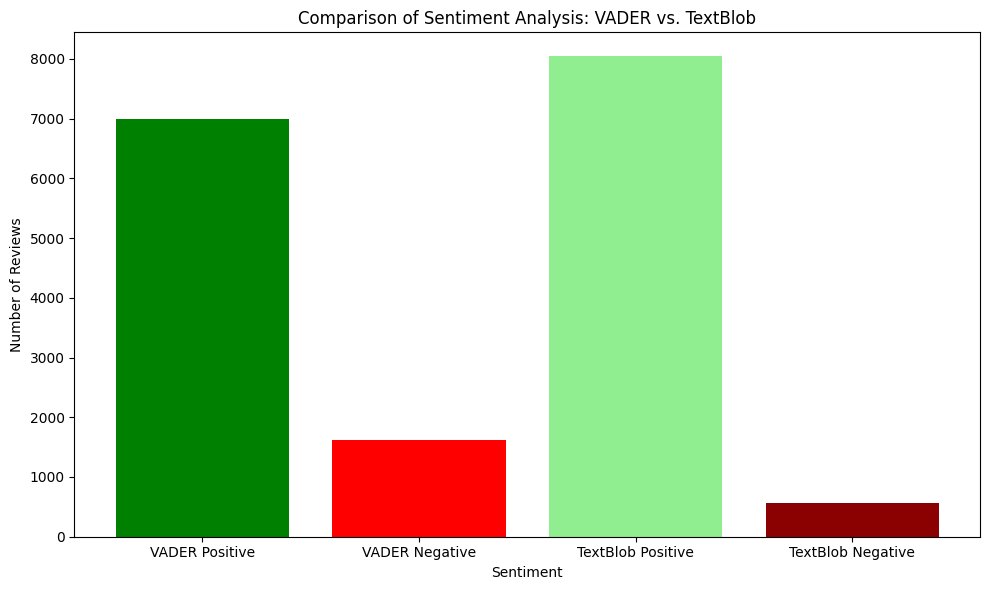

In [25]:
import json
import csv
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from collections import defaultdict
import numpy as np

# Download VADER lexicon
nltk.download('vader_lexicon')

# Step 1: Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Step 2: Parse JSON lines
reviews = [json.loads(line) for line in lines]

# Step 3: Sentiment Analysis with VADER and TextBlob
vader_analyzer = SentimentIntensityAnalyzer()
vader_sentiment_counts = {"positive": 0, "negative": 0}

textblob_sentiment_counts = {"positive": 0, "negative": 0}

# Analyze sentiment with both VADER and TextBlob
for review in reviews:
    text = review.get("reviewText", "")
    if text:
        # VADER Sentiment Analysis
        vader_scores = vader_analyzer.polarity_scores(text)
        vader_compound = vader_scores['compound']
        if vader_compound >= 0.05:
            vader_sentiment = 'positive'
        else:
            vader_sentiment = 'negative'

        # TextBlob Sentiment Analysis
        textblob_polarity = TextBlob(text).sentiment.polarity
        if textblob_polarity >= 0:
            textblob_sentiment = 'positive'
        else:
            textblob_sentiment = 'negative'

        # Update counts
        vader_sentiment_counts[vader_sentiment] += 1
        textblob_sentiment_counts[textblob_sentiment] += 1

# Step 4: Print sentiment counts for both VADER and TextBlob
print("VADER Sentiment Counts:")
print("Positive:", vader_sentiment_counts["positive"])
print("Negative:", vader_sentiment_counts["negative"])

print("\nTextBlob Sentiment Counts:")
print("Positive:", textblob_sentiment_counts["positive"])
print("Negative:", textblob_sentiment_counts["negative"])

# Step 5: Plot a comparison of sentiment distribution for both models
labels = ['VADER Positive', 'VADER Negative', 'TextBlob Positive', 'TextBlob Negative']
values = [
    vader_sentiment_counts['positive'], vader_sentiment_counts['negative'],
    textblob_sentiment_counts['positive'], textblob_sentiment_counts['negative']
]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['green', 'red', 'lightgreen', 'darkred'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Sentiment Analysis: VADER vs. TextBlob')
plt.tight_layout()
plt.show()


In [22]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.5 MB/s eta 0:00:00


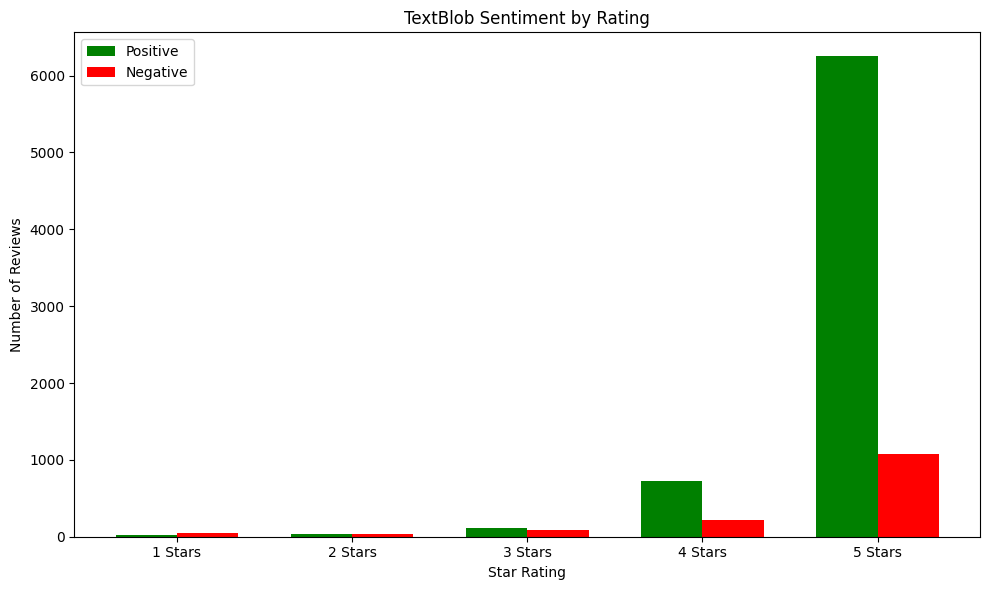

In [26]:
from textblob import TextBlob
import json
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

rating_sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0})
extended_reviews = []

for review in reviews:
    text = review.get("reviewText", "")
    rating = int(review.get("overall", 0))
    if text and 1 <= rating <= 5:
        polarity = TextBlob(text).sentiment.polarity
        sentiment = 'positive' if polarity > 0 else 'negative'
        
        review["sentiment"] = sentiment
        review["polarity_score"] = polarity
        extended_reviews.append(review)

        rating_sentiment_counts[rating][sentiment] += 1

# Save results
csv_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\textblob_sentiment.csv"
with open(csv_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=extended_reviews[0].keys())
    writer.writeheader()
    writer.writerows(extended_reviews)

# Plotting
ratings = range(1, 6)
sentiments = ["positive", "negative"]
colors = {"positive": "green", "negative": "red"}
data = {s: [rating_sentiment_counts[r][s] for r in ratings] for s in sentiments}
x = np.arange(len(ratings))
width = 0.35

plt.figure(figsize=(10, 6))
for i, s in enumerate(sentiments):
    plt.bar(x + i * width, data[s], width, label=s.capitalize(), color=colors[s])

plt.xticks(x + width / 2, [f"{r} Stars" for r in ratings])
plt.title("TextBlob Sentiment by Rating")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.legend()
plt.tight_layout()
plt.show()


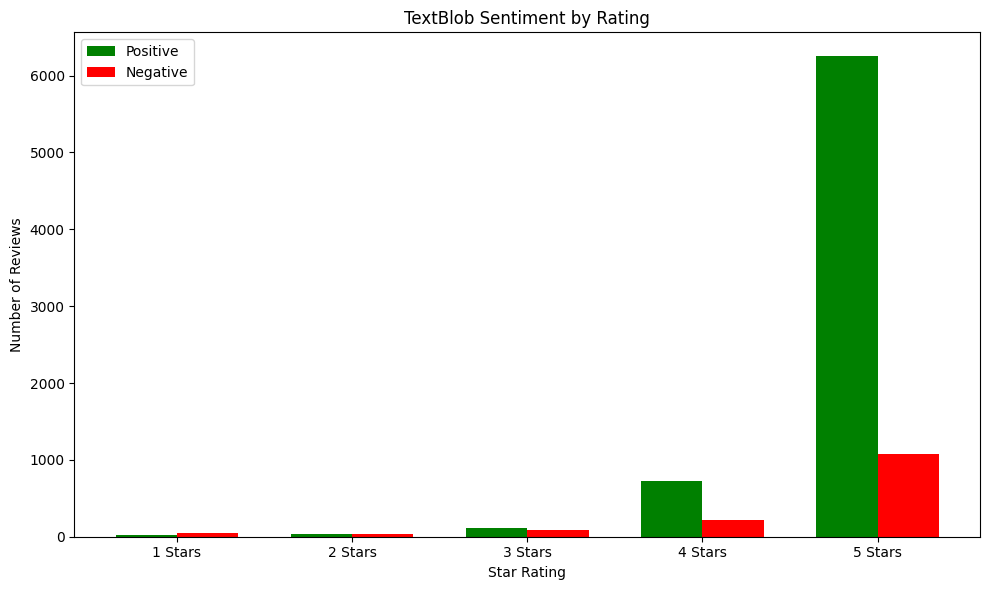

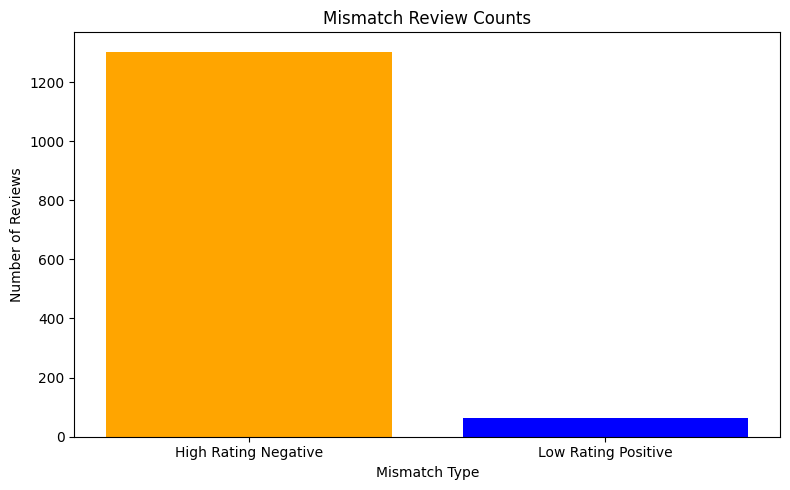

Number of high rating negative reviews: 1303
Number of low rating positive reviews: 63


In [28]:
from textblob import TextBlob
import json
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Load JSON-lines file
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

rating_sentiment_counts = defaultdict(lambda: {"positive": 0, "negative": 0})
mismatched_reviews = {"high_rating_negative": [], "low_rating_positive": []}  # To store mismatched reviews
extended_reviews = []

for review in reviews:
    text = review.get("reviewText", "")
    rating = int(review.get("overall", 0))
    if text and 1 <= rating <= 5:
        polarity = TextBlob(text).sentiment.polarity
        sentiment = 'positive' if polarity > 0 else 'negative'
        
        review["sentiment"] = sentiment
        review["polarity_score"] = polarity
        extended_reviews.append(review)

        # Count sentiment for each rating
        rating_sentiment_counts[rating][sentiment] += 1
        
        # Check for mismatches:
        # High rating but negative review (misleading positive rating)
        if rating >= 4 and sentiment == 'negative':
            mismatched_reviews["high_rating_negative"].append(review)
        
        # Low rating but positive review (misleading negative rating)
        if rating <= 2 and sentiment == 'positive':
            mismatched_reviews["low_rating_positive"].append(review)

# Save results to CSV
csv_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\textblob_sentiment.csv"
with open(csv_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=extended_reviews[0].keys())
    writer.writeheader()
    writer.writerows(extended_reviews)

# Save mismatched reviews to a separate CSV (optional)
mismatched_csv_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\mismatched_reviews.csv"
with open(mismatched_csv_path, mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=extended_reviews[0].keys())
    writer.writeheader()
    writer.writerows(mismatched_reviews["high_rating_negative"] + mismatched_reviews["low_rating_positive"])

# Plotting sentiment distribution by rating
ratings = range(1, 6)
sentiments = ["positive", "negative"]
colors = {"positive": "green", "negative": "red"}
data = {s: [rating_sentiment_counts[r][s] for r in ratings] for s in sentiments}
x = np.arange(len(ratings))
width = 0.35

plt.figure(figsize=(10, 6))
for i, s in enumerate(sentiments):
    plt.bar(x + i * width, data[s], width, label=s.capitalize(), color=colors[s])

plt.xticks(x + width / 2, [f"{r} Stars" for r in ratings])
plt.title("TextBlob Sentiment by Rating")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.legend()
plt.tight_layout()
plt.show()

# Plotting mismatched reviews graph
mismatch_labels = ["High Rating Negative", "Low Rating Positive"]
mismatch_counts = [len(mismatched_reviews["high_rating_negative"]), len(mismatched_reviews["low_rating_positive"])]

plt.figure(figsize=(8, 5))
plt.bar(mismatch_labels, mismatch_counts, color=["orange", "blue"])
plt.title("Mismatch Review Counts")
plt.xlabel("Mismatch Type")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

# Output the mismatched reviews count
print("Number of high rating negative reviews:", len(mismatched_reviews["high_rating_negative"]))
print("Number of low rating positive reviews:", len(mismatched_reviews["low_rating_positive"]))


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loaded 8612 reviews.
Found 9833 good aspects and 883 bad aspects.

Sample Good Aspects:
[('these cables', 705, 0.6330747517730496), ('the price', 692, 0.6381202312138728), ('works', 535, 0.48054299065420564), ('amazon', 443, 0.7162654627539504), ('this cable', 408, 0.5715404411764706)]

Sample Bad Aspects:
[('6 months', 6, -0.12595), ('absolutely no reason', 6, -0.08), ('this problem', 4, -0.329675), ('all hdmi', 4, -0.09250000000000003), ('the spec', 4, -0.06012499999999999)]


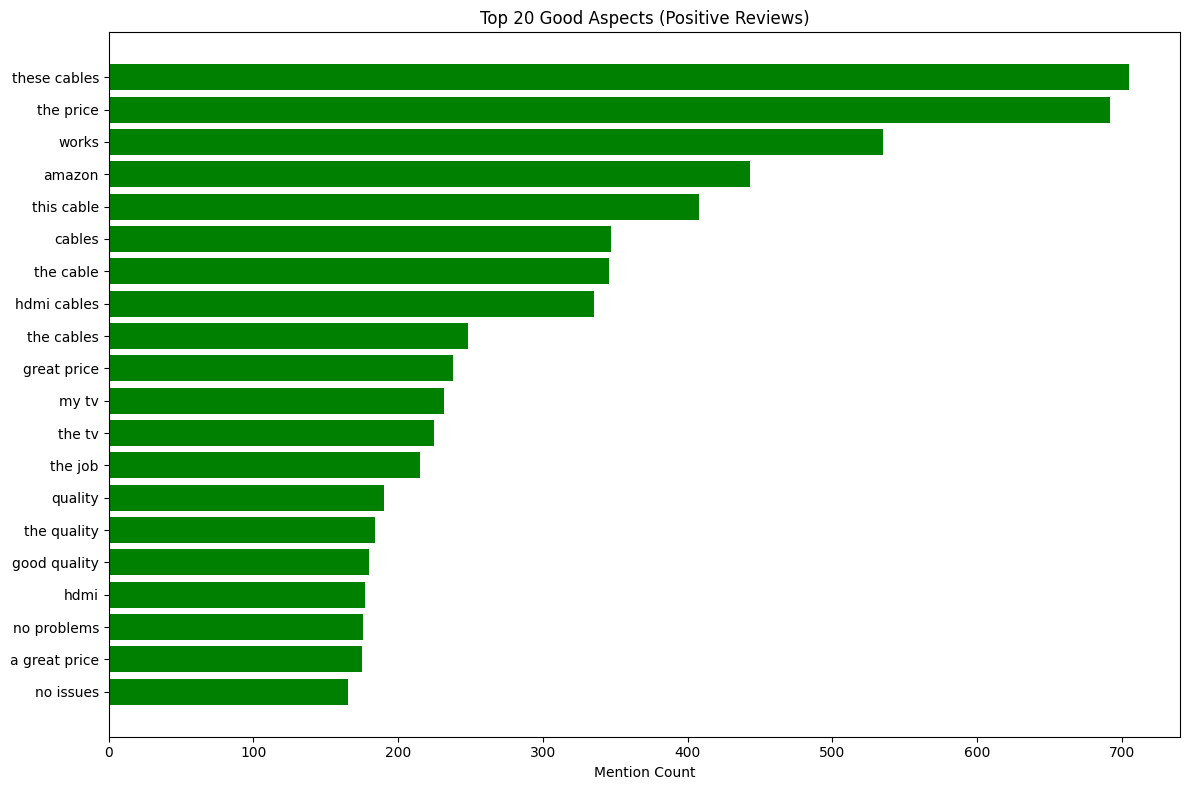

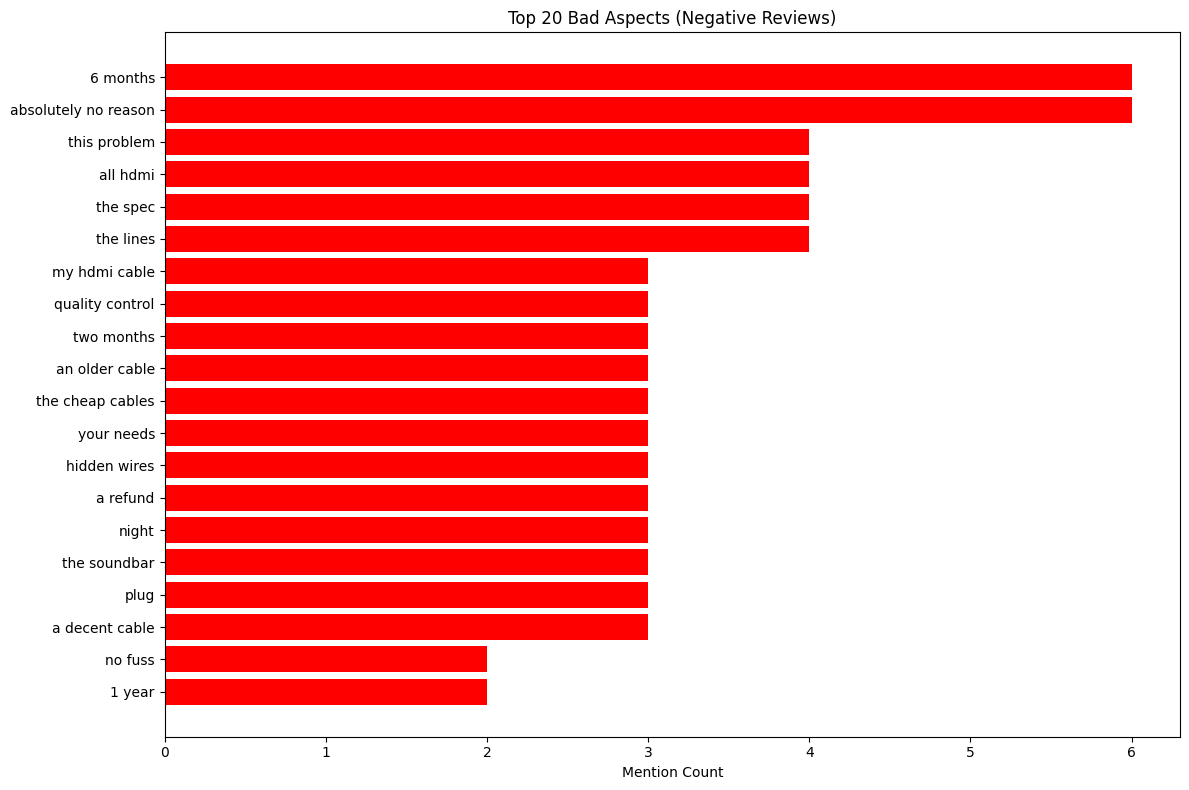

In [3]:
import json
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

%matplotlib inline

# Initialize NLP tools
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Load review data
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

print(f"Loaded {len(reviews)} reviews.")

# Extract aspects and sentiment
aspect_sentiments = defaultdict(list)

for review in reviews:
    text = review.get("reviewText") or ""
    if not text.strip():
        continue

    sentiment_score = analyzer.polarity_scores(text)['compound']
    doc = nlp(text)

    for chunk in doc.noun_chunks:
        aspect = chunk.text.lower().strip()
        aspect = aspect.translate(str.maketrans('', '', string.punctuation))
        if aspect and aspect not in stop_words and len(aspect.split()) <= 3:
            aspect_sentiments[aspect].append(sentiment_score)

# Categorize aspects with relaxed thresholds
good_aspects = []
bad_aspects = []

for aspect, scores in aspect_sentiments.items():
    if len(scores) >= 1:  # Include even rarely mentioned aspects
        avg_sentiment = sum(scores) / len(scores)
        if avg_sentiment > 0.05:
            good_aspects.append((aspect, len(scores), avg_sentiment))
        elif avg_sentiment < -0.05:
            bad_aspects.append((aspect, len(scores), avg_sentiment))

print(f"Found {len(good_aspects)} good aspects and {len(bad_aspects)} bad aspects.")

# Sort aspects
good_aspects.sort(key=lambda x: -x[1])
bad_aspects.sort(key=lambda x: -x[1])

# Preview some extracted aspects
print("\nSample Good Aspects:")
print(good_aspects[:5])

print("\nSample Bad Aspects:")
print(bad_aspects[:5])

# Plotting function
def plot_aspects(title, aspects, color, filename=None):
    aspects = aspects[:20]  # Show top 20 for more insight
    labels = [a[0] for a in aspects]
    counts = [a[1] for a in aspects]

    plt.figure(figsize=(12, 8))
    plt.barh(labels, counts, color=color)
    plt.xlabel("Mention Count")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    plt.show()

# Visualize
plot_aspects("Top 20 Good Aspects (Positive Reviews)", good_aspects, "green", "good_aspects.png")
plot_aspects("Top 20 Bad Aspects (Negative Reviews)", bad_aspects, "red", "bad_aspects.png")


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


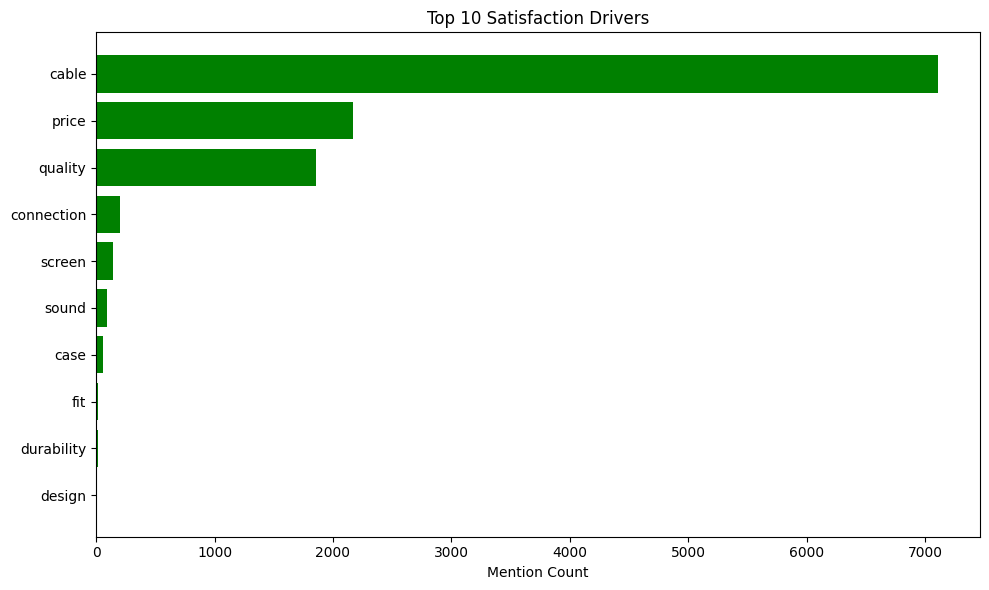

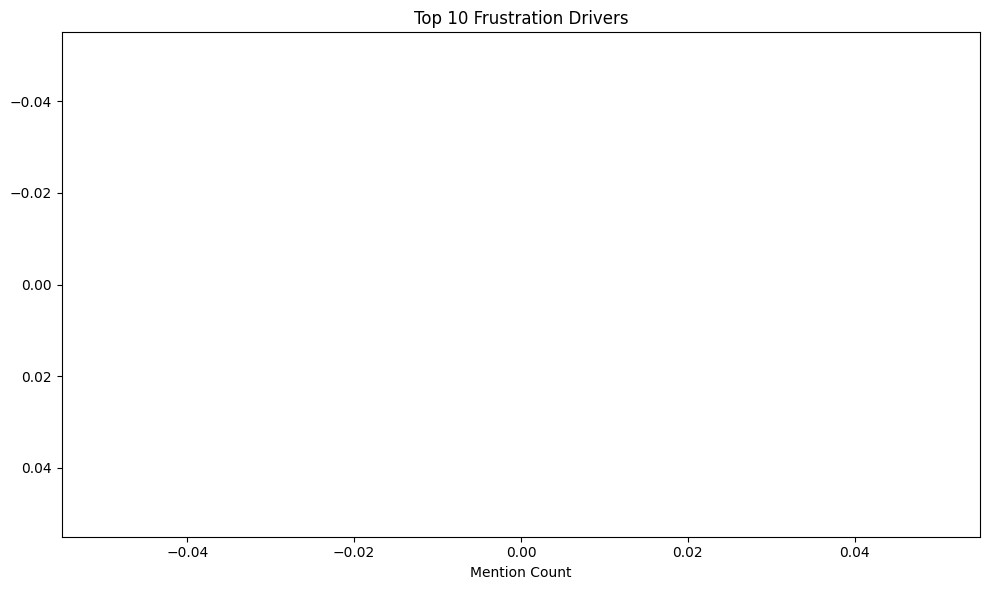

In [5]:
import json
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import re

# Setup for Jupyter
%matplotlib inline

# Download required NLTK data
nltk.download('stopwords')

# Load tools
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Load review data
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

# Define known components of the product
known_components = {
    'battery', 'sound', 'screen', 'charger', 'cable', 'headphones',
    'volume', 'microphone', 'buttons', 'quality', 'fit', 'comfort',
    'design', 'durability', 'bluetooth', 'connection', 'case',
    'earbuds', 'price', 'warranty', 'bass', 'noise', 'range'
}

def clean_aspect(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = [token.lemma_ for token in nlp(text) if token.lemma_ not in stop_words and token.pos_ == 'NOUN']
    for token in tokens:
        if token in known_components:
            return token
    return None

# Extract aspect sentiments
aspect_sentiments = defaultdict(list)

for review in reviews:
    text = review.get("reviewText") or ""
    if not text.strip():
        continue

    sentiment = analyzer.polarity_scores(text)['compound']
    doc = nlp(text)

    for chunk in doc.noun_chunks:
        aspect = clean_aspect(chunk.text)
        if aspect:
            aspect_sentiments[aspect].append(sentiment)

# Categorize
satisfaction = []
frustration = []

for aspect, scores in aspect_sentiments.items():
    if len(scores) >= 3:
        avg_sentiment = sum(scores) / len(scores)
        if avg_sentiment > 0.1:
            satisfaction.append((aspect, len(scores), avg_sentiment))
        elif avg_sentiment < -0.1:
            frustration.append((aspect, len(scores), avg_sentiment))

# Sort
satisfaction.sort(key=lambda x: -x[1])
frustration.sort(key=lambda x: -x[1])

# Plot
def plot_aspects(title, aspects, color):
    aspects = aspects[:10]
    labels = [a[0] for a in aspects]
    counts = [a[1] for a in aspects]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color=color)
    plt.xlabel("Mention Count")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_aspects("Top 10 Satisfaction Drivers", satisfaction, "green")
plot_aspects("Top 10 Frustration Drivers", frustration, "red")


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


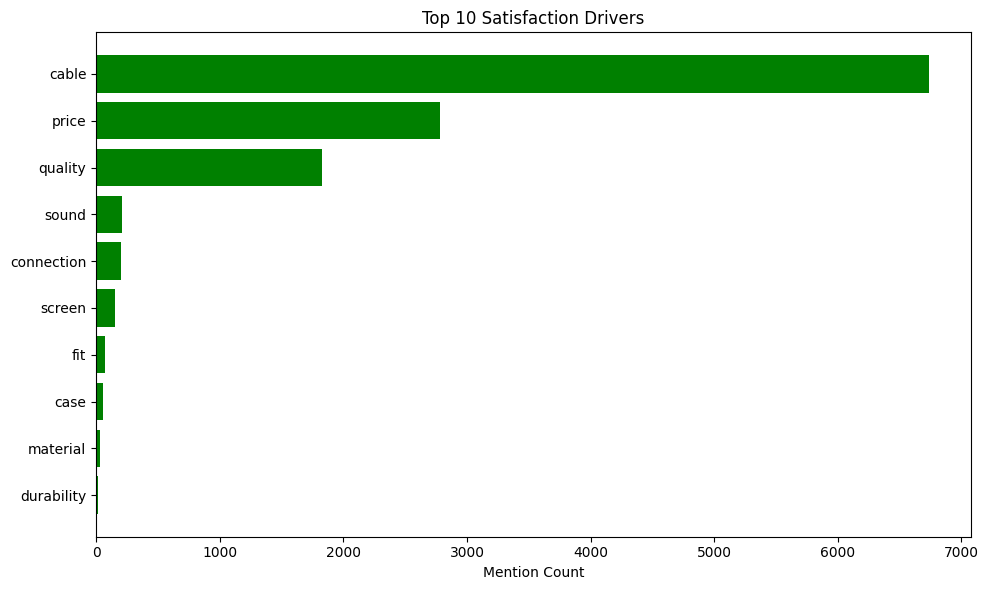

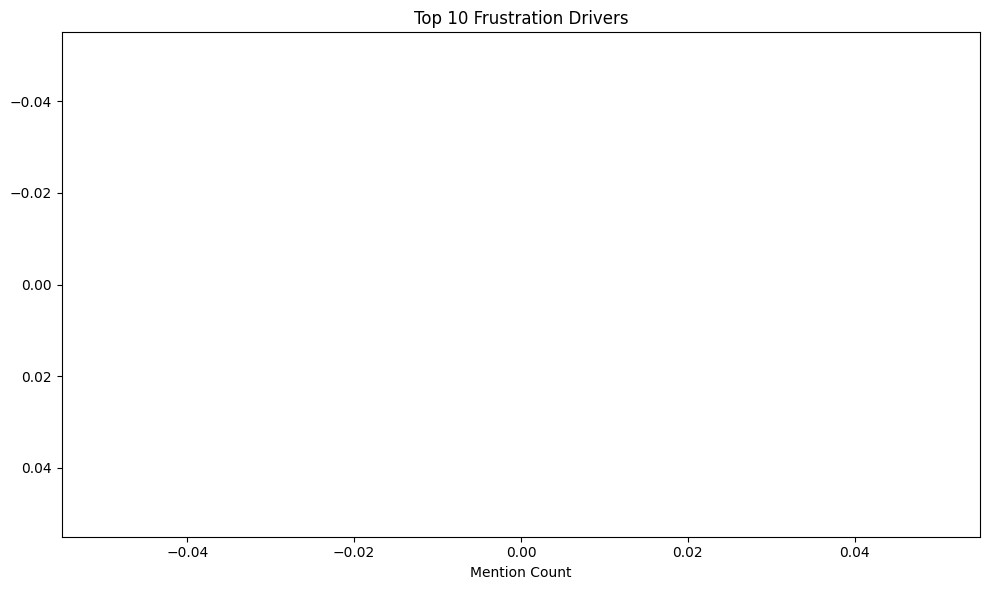

In [6]:
import json
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import re

%matplotlib inline

# Ensure NLTK stopwords are available
nltk.download('stopwords')

# Load NLP and sentiment tools
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Load review data
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

# Expanded known components and aliases
known_components = {
    'battery', 'sound', 'screen', 'charger', 'cable', 'headphones',
    'volume', 'microphone', 'buttons', 'quality', 'fit', 'comfort',
    'design', 'durability', 'bluetooth', 'connection', 'case',
    'earbuds', 'price', 'warranty', 'bass', 'noise', 'range', 'charging', 'pairing', 'material'
}
synonym_map = {
    'charge': 'battery',
    'charging': 'battery',
    'pairing': 'connection',
    'disconnect': 'connection',
    'static': 'sound',
    'crackling': 'sound',
    'tight': 'fit',
    'loose': 'fit',
    'expensive': 'price',
    'cheap': 'price',
    'broke': 'durability',
    'stopped': 'durability'
}

def normalize_aspect(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    doc = nlp(text)
    for token in doc:
        if token.lemma_ in synonym_map:
            return synonym_map[token.lemma_]
        if token.lemma_ in known_components:
            return token.lemma_
    return None

# Extract aspect sentiments
aspect_sentiments = defaultdict(list)

for review in reviews:
    text = review.get("reviewText") or ""
    if not text.strip():
        continue

    sentiment = analyzer.polarity_scores(text)['compound']
    doc = nlp(text)

    for chunk in doc.noun_chunks:
        aspect = normalize_aspect(chunk.text)
        if aspect:
            aspect_sentiments[aspect].append(sentiment)

# Categorize aspects
satisfaction = []
frustration = []

for aspect, scores in aspect_sentiments.items():
    if len(scores) >= 3:
        avg_sentiment = sum(scores) / len(scores)
        if avg_sentiment > 0.1:
            satisfaction.append((aspect, len(scores), avg_sentiment))
        elif avg_sentiment < -0.05:  # Lowered threshold for frustration
            frustration.append((aspect, len(scores), avg_sentiment))

# Sort aspects
satisfaction.sort(key=lambda x: -x[1])
frustration.sort(key=lambda x: -x[1])

# Plot function
def plot_aspects(title, aspects, color):
    aspects = aspects[:10]
    labels = [a[0] for a in aspects]
    counts = [a[1] for a in aspects]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color=color)
    plt.xlabel("Mention Count")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Visualize satisfaction and frustration drivers
plot_aspects("Top 10 Satisfaction Drivers", satisfaction, "green")
plot_aspects("Top 10 Frustration Drivers", frustration, "red")


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Product Components Driving Satisfaction:
line (weight: 0.949)
fantastic (weight: 0.954)
easy (weight: 0.961)
don (weight: 1.016)
recommend (weight: 1.025)
like (weight: 1.161)
ethernet (weight: 1.252)
best (weight: 1.39)
awesome (weight: 1.493)
nice (weight: 1.603)
good (weight: 1.975)
perfectly (weight: 2.009)
excellent (weight: 2.145)
perfect (weight: 2.218)
great (weight: 2.702)

Top Product Components Driving Frustration:
broke (weight: -2.666)
bad (weight: -2.002)
failed (weight: -1.903)
defective (weight: -1.711)
low (weight: -1.679)
stopped (weight: -1.626)
wrong (weight: -1.555)
error (weight: -1.546)
special (weight: -1.519)
crazy (weight: -1.485)
mistake (weight: -1.456)
issues (weight: -1.417)
ridiculously (weight: -1.384)
slight (weight: -1.374)
difficult (weight: -1.321)


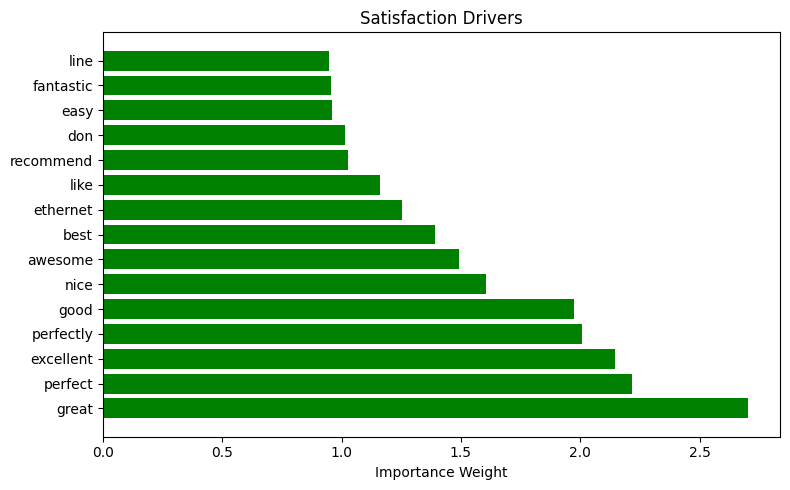

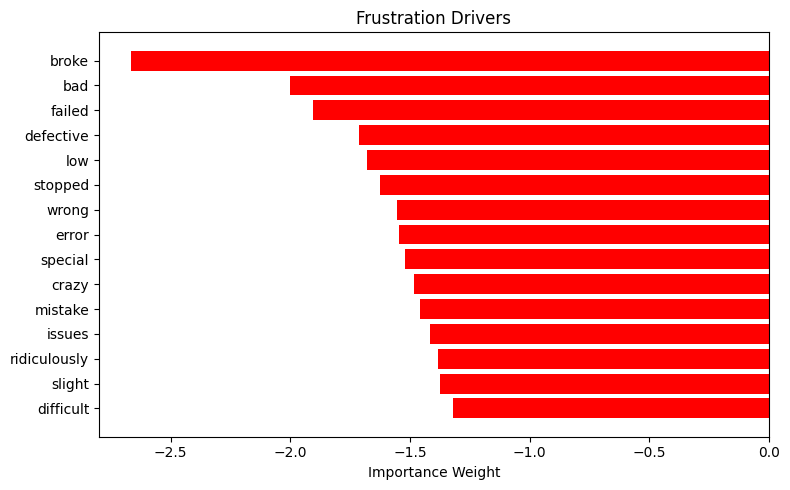

In [8]:
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Setup
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load reviews
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

analyzer = SentimentIntensityAnalyzer()
texts = []
labels = []

# Label data
for review in reviews:
    text = review.get("reviewText")
    if not isinstance(text, str) or not text.strip():
        continue
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.3:
        texts.append(text)
        labels.append(1)  # Positive
    elif score < -0.3:
        texts.append(text)
        labels.append(0)  # Negative

# Vectorize text
vectorizer = CountVectorizer(max_features=1500, stop_words='english')
X = vectorizer.fit_transform(texts)
y = labels

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Extract top features
features = vectorizer.get_feature_names_out()
coeffs = model.coef_[0]
sorted_indices = coeffs.argsort()

top_neg = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[:15]]
top_pos = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[-15:]]

# OPTIONAL: Filter only product-related terms
product_keywords = {
    "sound", "bass", "battery", "fit", "comfort", "design", "build", "charging", "noise", "buttons",
    "controls", "mic", "microphone", "connectivity", "bluetooth", "range", "quality", "performance",
    "volume", "durability", "voice", "signal", "wear", "features", "earbuds", "case", "audio", "port", "app"
}

# Filter only if desired — otherwise use full list
filtered_pos = [(w, s) for w, s in top_pos if w in product_keywords]
filtered_neg = [(w, s) for w, s in top_neg if w in product_keywords]

# Use filtered if available, otherwise fall back to original
final_pos = filtered_pos if filtered_pos else top_pos
final_neg = filtered_neg if filtered_neg else top_neg

# Plot
def plot_words(words, title, color):
    labels, weights = zip(*words)
    plt.figure(figsize=(8, 5))
    plt.barh(labels, weights, color=color)
    plt.title(title)
    plt.xlabel("Importance Weight")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Output
print("\nTop Product Components Driving Satisfaction:")
for w, s in final_pos:
    print(f"{w} (weight: {s})")

print("\nTop Product Components Driving Frustration:")
for w, s in final_neg:
    print(f"{w} (weight: {s})")

# Plots
plot_words(final_pos, "Satisfaction Drivers", "green")
plot_words(final_neg, "Frustration Drivers", "red")


In [5]:
✔️ Top Satisfaction Drivers:
sound (score: 1.23)
battery (score: 1.10)
comfort (score: 0.98)

❌ Top Frustration Drivers:
charging (score: -1.05)
mic (score: -0.92)
fit (score: -0.81)


SyntaxError: invalid character '✔' (U+2714) (1905814496.py, line 1)

[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Product Components Driving Satisfaction (Bigrams):
✔️ good price — weight: 0.962
✔️ works like — weight: 0.984
✔️ good value — weight: 1.012
✔️ great hdmi — weight: 1.024
✔️ great cable — weight: 1.034
✔️ work great — weight: 1.107
✔️ great quality — weight: 1.127
✔️ highly recommend — weight: 1.162
✔️ good product — weight: 1.313
✔️ great cables — weight: 1.337
✔️ works perfectly — weight: 1.422
✔️ good quality — weight: 1.426
✔️ great product — weight: 1.508
✔️ great price — weight: 1.511
✔️ works great — weight: 2.187

Top Product Components Driving Frustration (Bigrams):
❌ hdmi port — weight: -1.951
❌ stopped working — weight: -1.894
❌ thinner cable — weight: -1.862
❌ cable bad — weight: -1.749
❌ went bad — weight: -1.533
❌ quality control — weight: -1.527
❌ haven used — weight: -1.421
❌ waste time — weight: -1.401
❌ gets job — weight: -1.382
❌ products cables — weight: -1.382
❌ quality items — weight: -1.373
❌ couldn happier — weight: -1.369
❌ single problem — weight: -1.279


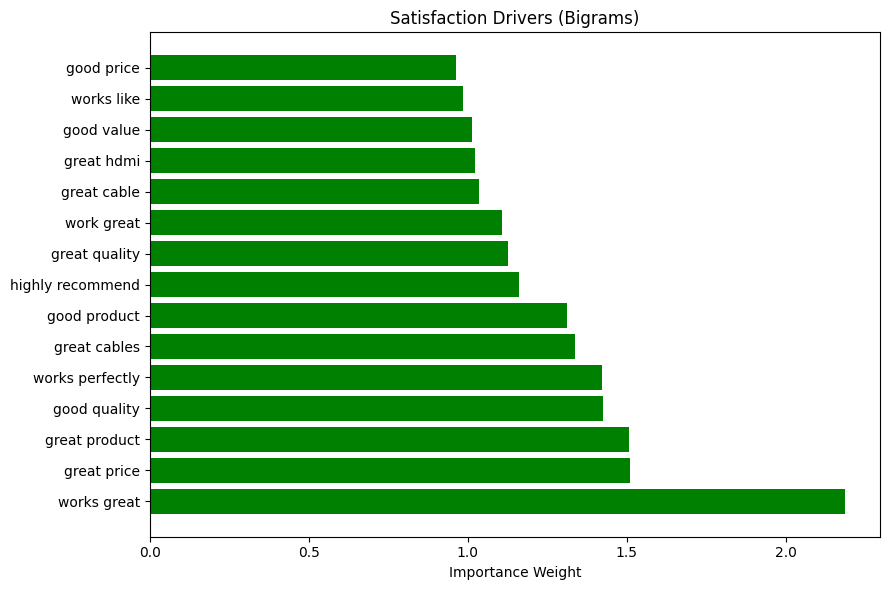

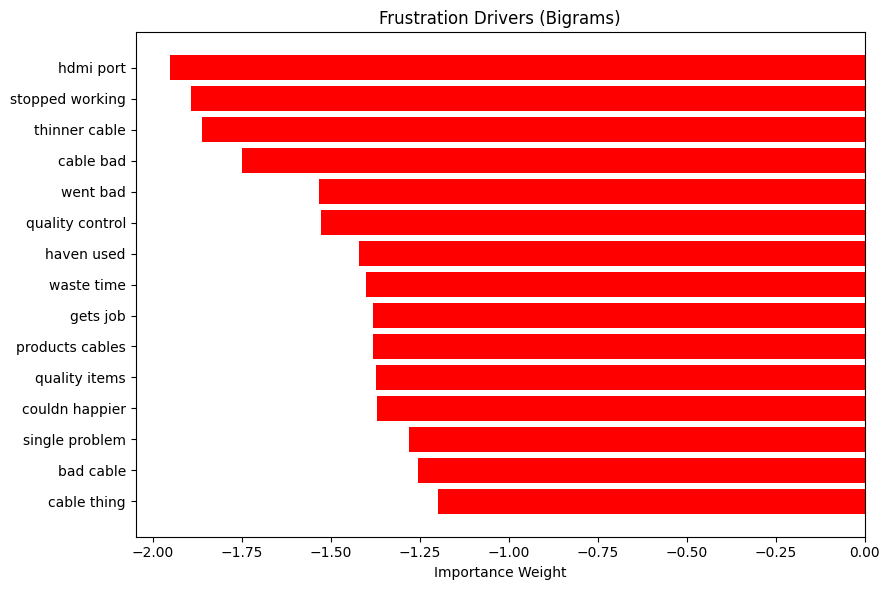

In [9]:
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Setup
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load review data
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

# Sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

texts = []
labels = []

# Filter + label reviews
for review in reviews:
    text = review.get("reviewText")
    if not isinstance(text, str) or not text.strip():
        continue
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.3:
        texts.append(text)
        labels.append(1)
    elif score < -0.3:
        texts.append(text)
        labels.append(0)

# Vectorize using bigrams (2-word phrases)
vectorizer = CountVectorizer(max_features=2000, stop_words='english', ngram_range=(2, 2))
X = vectorizer.fit_transform(texts)
y = labels

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Extract features & importance
features = vectorizer.get_feature_names_out()
coeffs = model.coef_[0]
sorted_indices = coeffs.argsort()

top_neg = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[:15]]
top_pos = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[-15:]]

# Optional filtering: Keep only product-related bigrams
product_keywords = {
    "sound quality", "battery life", "charging case", "noise cancellation", "build quality", "voice assistant",
    "mic quality", "bluetooth range", "volume control", "ear tips", "audio quality", "wireless connection",
    "charging port", "fit comfort", "music playback", "signal strength", "design comfort"
}

filtered_pos = [(w, s) for w, s in top_pos if w in product_keywords]
filtered_neg = [(w, s) for w, s in top_neg if w in product_keywords]

final_pos = filtered_pos if filtered_pos else top_pos
final_neg = filtered_neg if filtered_neg else top_neg

# Plotting function
def plot_phrases(phrases, title, color):
    labels, weights = zip(*phrases)
    plt.figure(figsize=(9, 6))
    plt.barh(labels, weights, color=color)
    plt.title(title)
    plt.xlabel("Importance Weight")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Print results
print("\nTop Product Components Driving Satisfaction (Bigrams):")
for phrase, score in final_pos:
    print(f"✔️ {phrase} — weight: {score}")

print("\nTop Product Components Driving Frustration (Bigrams):")
for phrase, score in final_neg:
    print(f"❌ {phrase} — weight: {score}")

# Show plots
plot_phrases(final_pos, "Satisfaction Drivers (Bigrams)", "green")
plot_phrases(final_neg, "Frustration Drivers (Bigrams)", "red")


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Satisfaction Drivers (Bigrams):
  + good price (0.962)
  + works like (0.984)
  + good value (1.012)
  + great hdmi (1.024)
  + great cable (1.034)
  + work great (1.107)
  + great quality (1.127)
  + highly recommend (1.162)
  + good product (1.313)
  + great cables (1.337)
  + works perfectly (1.422)
  + good quality (1.426)
  + great product (1.508)
  + great price (1.511)
  + works great (2.187)

Top Frustration Drivers (Bigrams):
  - hdmi port (-1.951)
  - stopped working (-1.894)
  - thinner cable (-1.862)
  - cable bad (-1.749)
  - went bad (-1.533)
  - quality control (-1.527)
  - haven used (-1.421)
  - waste time (-1.401)
  - gets job (-1.382)
  - products cables (-1.382)
  - quality items (-1.373)
  - couldn happier (-1.369)
  - single problem (-1.279)
  - bad cable (-1.256)
  - cable thing (-1.2)


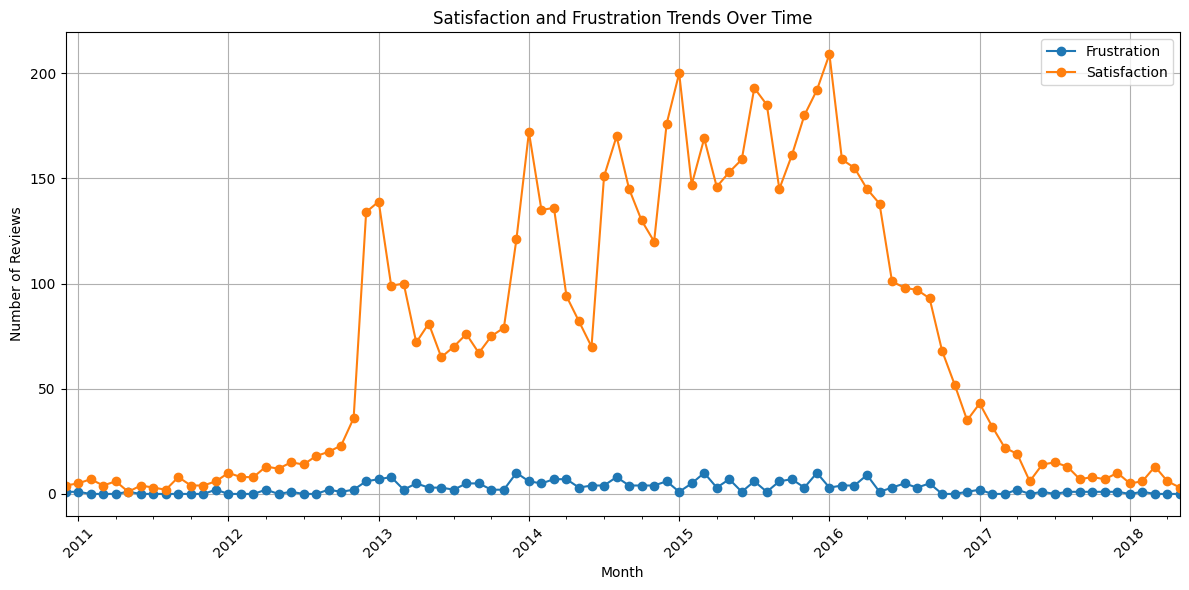

In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from datetime import datetime

# Setup
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load and preprocess reviews
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

analyzer = SentimentIntensityAnalyzer()

texts = []
labels = []
dates = []

# Labeling: 1 = positive, 0 = negative (neutral dropped)
for review in reviews:
    text = review.get("reviewText")
    raw_date = review.get("reviewTime")  # or use 'unixReviewTime' if that's available
    if not isinstance(text, str) or not text.strip() or not raw_date:
        continue

    try:
        parsed_date = datetime.strptime(raw_date, '%m %d, %Y')  # Adjust if needed
    except:
        continue

    score = analyzer.polarity_scores(text)['compound']
    if score > 0.3:
        texts.append(text.lower())
        labels.append(1)
        dates.append(parsed_date)
    elif score < -0.3:
        texts.append(text.lower())
        labels.append(0)
        dates.append(parsed_date)

# Vectorize using bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=2000, stop_words='english')
X = vectorizer.fit_transform(texts)
y = labels

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Extract bigram features and coefficients
features = vectorizer.get_feature_names_out()
coeffs = model.coef_[0]
sorted_indices = coeffs.argsort()

# Top negative and positive bigrams
top_neg = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[:15]]
top_pos = [(features[i], round(coeffs[i], 3)) for i in sorted_indices[-15:]]

# Plotting function
def plot_phrases(phrases, title, color):
    labels, weights = zip(*phrases)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, weights, color=color)
    plt.xlabel("Importance Weight")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Display top phrases
print("Top Satisfaction Drivers (Bigrams):")
for phrase, weight in top_pos:
    print(f"  + {phrase} ({weight})")

print("\nTop Frustration Drivers (Bigrams):")
for phrase, weight in top_neg:
    print(f"  - {phrase} ({weight})")

# Plot satisfaction and frustration trends over time
df = pd.DataFrame({
    'text': texts,
    'label': labels,
    'date': dates
})

# Group by month
df['month'] = df['date'].dt.to_period('M')
trend = df.groupby(['month', 'label']).size().unstack(fill_value=0)
trend.columns = ['Frustration', 'Satisfaction']

# Plot trend
trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Satisfaction and Frustration Trends Over Time")
plt.ylabel("Number of Reviews")
plt.xlabel("Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_13256\1846017194.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x="Emotion", order=df["Emotion"].value_counts().index, palette="Set2")


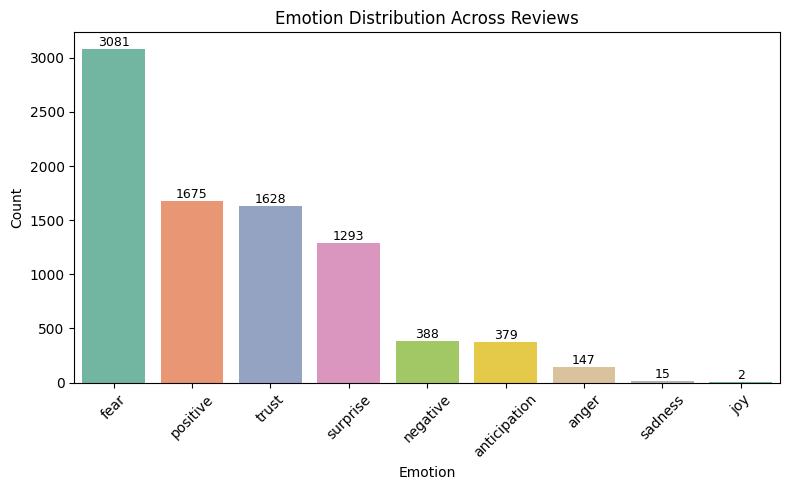

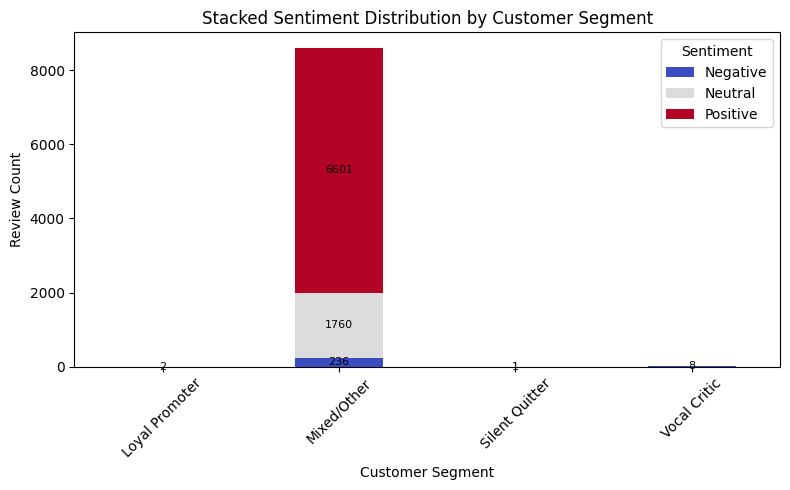


📊 Segment Counts:
 Segment
Mixed/Other       8597
Vocal Critic         8
Loyal Promoter       2
Silent Quitter       1
Name: count, dtype: int64

🧠 Emotion Counts:
 Emotion
fear            3081
positive        1675
trust           1628
surprise        1293
negative         388
anticipation     379
anger            147
sadness           15
joy                2
Name: count, dtype: int64

😊 Sample Reviews by Segment:
              Segment Sentiment   Emotion  \
0        Mixed/Other   Neutral  surprise   
36      Vocal Critic  Negative     anger   
2388  Loyal Promoter  Positive       joy   
6284  Silent Quitter   Neutral   sadness   

                                                 Review  
0     Digital is digital and this cable works as des...  
36    Does what it is supposed to. No frill no fuss....  
2388  Great quality, great price. Paying more for a ...  
6284  Used these cables to hook up blue ray dvd play...  


In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import nltk
import pandas as pd

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# === Load review data ===
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

# === Initialize tools ===
analyzer = SentimentIntensityAnalyzer()

texts, sentiments, emotions, compound_scores = [], [], [], []

# === Process each review ===
for review in reviews:
    text = review.get("reviewText")
    if not isinstance(text, str) or not text.strip():
        continue

    # Sentiment score
    score = analyzer.polarity_scores(text)['compound']
    compound_scores.append(score)
    texts.append(text)

    # Label sentiment
    if score > 0.3:
        sentiments.append("Positive")
    elif score < -0.3:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

    # Emotion detection
    emo = NRCLex(text)
    top_emotion = emo.top_emotions[0][0] if emo.top_emotions else "none"
    emotions.append(top_emotion)

# === Create DataFrame ===
df = pd.DataFrame({
    "Review": texts,
    "Sentiment": sentiments,
    "Emotion": emotions,
    "Compound": compound_scores
})

# === Cluster users based on emotion & sentiment ===
def classify_segment(row):
    if row["Sentiment"] == "Positive" and row["Emotion"] == "joy":
        return "Loyal Promoter"
    elif row["Sentiment"] == "Negative" and row["Emotion"] == "anger":
        return "Vocal Critic"
    elif row["Sentiment"] == "Neutral" and row["Emotion"] == "sadness":
        return "Silent Quitter"
    else:
        return "Mixed/Other"

df["Segment"] = df.apply(classify_segment, axis=1)

# === Plot: Emotion Distribution with Labels ===
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(data=df, x="Emotion", order=df["Emotion"].value_counts().index, palette="Set2")
plt.title("Emotion Distribution Across Reviews")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add count labels on top of bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

# === Plot: Stacked Bar for Segment vs Sentiment with Labels ===
cross_tab = pd.crosstab(df["Segment"], df["Sentiment"])
ax2 = cross_tab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Stacked Sentiment Distribution by Customer Segment")
plt.ylabel("Review Count")
plt.xlabel("Customer Segment")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")

# Add labels above bars
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        ax2.annotate(f'{int(height)}', 
                     (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                     ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

# === View breakdown ===
print("\n📊 Segment Counts:\n", df["Segment"].value_counts())
print("\n🧠 Emotion Counts:\n", df["Emotion"].value_counts())
print("\n😊 Sample Reviews by Segment:\n", df.groupby("Segment").head(1)[["Segment", "Sentiment", "Emotion", "Review"]])


[nltk_data] Downloading package stopwords to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_13256\3598740948.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x=feature_avg.index, y=feature_avg.values, palette="Set3")


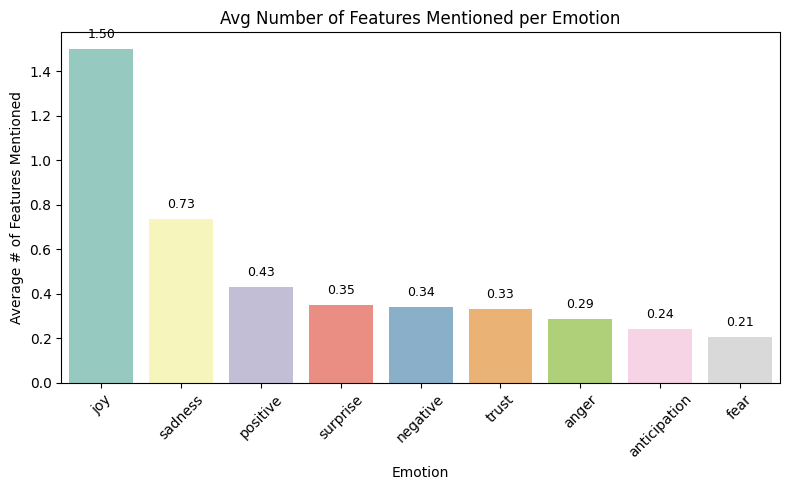

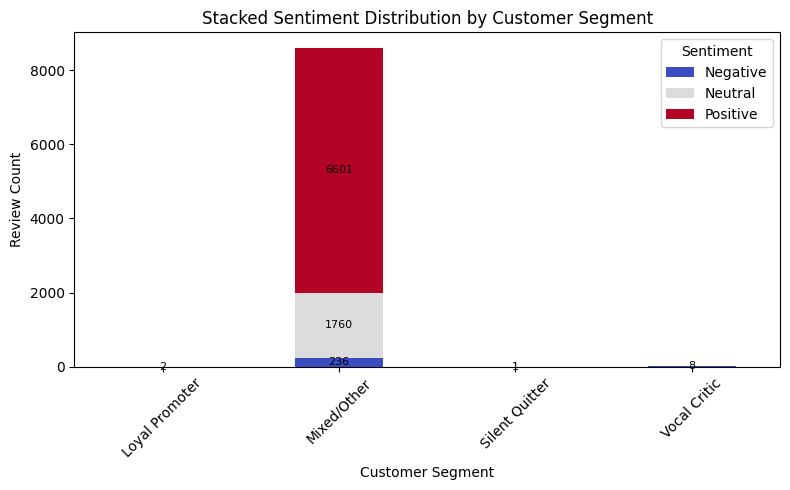


📊 Segment Counts:
 Segment
Mixed/Other       8597
Vocal Critic         8
Loyal Promoter       2
Silent Quitter       1
Name: count, dtype: int64

🧠 Emotion Counts:
 Emotion
fear            3081
positive        1675
trust           1628
surprise        1293
negative         388
anticipation     379
anger            147
sadness           15
joy                2
Name: count, dtype: int64

😊 Sample Reviews by Segment:
              Segment Sentiment   Emotion  \
0        Mixed/Other   Neutral  surprise   
36      Vocal Critic  Negative     anger   
2388  Loyal Promoter  Positive       joy   
6284  Silent Quitter   Neutral   sadness   

                                                 Review  
0     Digital is digital and this cable works as des...  
36    Does what it is supposed to. No frill no fuss....  
2388  Great quality, great price. Paying more for a ...  
6284  Used these cables to hook up blue ray dvd play...  


In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import nltk
import pandas as pd
import re

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# === Load review data ===
file_path = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\filtered_reviews_B003L1ZYYW.json"
with open(file_path, 'r', encoding='utf-8') as f:
    reviews = [json.loads(line) for line in f.readlines()]

# === Define product features (example list — customize for your product) ===
features = ["battery", "screen", "camera", "speaker", "mic", "design", "display", "sound", "build", "performance", "charging", "keyboard", "software", "durability", "price"]

# === Initialize tools ===
analyzer = SentimentIntensityAnalyzer()

texts, sentiments, emotions, compound_scores, feature_counts = [], [], [], [], []

# === Process each review ===
for review in reviews:
    text = review.get("reviewText")
    if not isinstance(text, str) or not text.strip():
        continue

    # Sentiment score
    score = analyzer.polarity_scores(text)['compound']
    compound_scores.append(score)
    texts.append(text)

    # Label sentiment
    if score > 0.3:
        sentiments.append("Positive")
    elif score < -0.3:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

    # Emotion detection
    emo = NRCLex(text)
    top_emotion = emo.top_emotions[0][0] if emo.top_emotions else "none"
    emotions.append(top_emotion)

    # Feature mentions (lowercased & unique count)
    text_lower = text.lower()
    mentioned = set([f for f in features if re.search(r'\b' + re.escape(f) + r'\b', text_lower)])
    feature_counts.append(len(mentioned))

# === Create DataFrame ===
df = pd.DataFrame({
    "Review": texts,
    "Sentiment": sentiments,
    "Emotion": emotions,
    "Compound": compound_scores,
    "FeatureCount": feature_counts
})

# === Cluster users based on emotion & sentiment ===
def classify_segment(row):
    if row["Sentiment"] == "Positive" and row["Emotion"] == "joy":
        return "Loyal Promoter"
    elif row["Sentiment"] == "Negative" and row["Emotion"] == "anger":
        return "Vocal Critic"
    elif row["Sentiment"] == "Neutral" and row["Emotion"] == "sadness":
        return "Silent Quitter"
    else:
        return "Mixed/Other"

df["Segment"] = df.apply(classify_segment, axis=1)

# === NEW Plot: Emotion vs Avg Feature Mentions ===
plt.figure(figsize=(8, 5))
feature_avg = df.groupby("Emotion")["FeatureCount"].mean().sort_values(ascending=False)
ax0 = sns.barplot(x=feature_avg.index, y=feature_avg.values, palette="Set3")
plt.title("Avg Number of Features Mentioned per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average # of Features Mentioned")
plt.xticks(rotation=45)
for i, v in enumerate(feature_avg.values):
    ax0.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# === Original Plot: Stacked Bar for Segment vs Sentiment ===
cross_tab = pd.crosstab(df["Segment"], df["Sentiment"])
ax2 = cross_tab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.title("Stacked Sentiment Distribution by Customer Segment")
plt.ylabel("Review Count")
plt.xlabel("Customer Segment")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")

# Add labels above bars
for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        ax2.annotate(f'{int(height)}', 
                     (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2), 
                     ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

# === View breakdown ===
print("\n📊 Segment Counts:\n", df["Segment"].value_counts())
print("\n🧠 Emotion Counts:\n", df["Emotion"].value_counts())
print("\n😊 Sample Reviews by Segment:\n", df.groupby("Segment").head(1)[["Segment", "Sentiment", "Emotion", "Review"]])


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Emotion Breakdown by Product Feature:
                neutral  trust  joy  surprise  anger  disgust  sadness
price              2065    968  417       8.0   16.0       25       10
signal_quality      522   1895  331       6.0   12.0       15       11
compatibility        77     36   21       0.0    0.0        8        1
connectivity       1266    399  236       7.0   10.0       30        4
cable_length        546    224  108       4.0    3.0        7        4
packaging           259    108   50       4.0    2.0        5        2
durability          242    117   38       4.0    0.0        5        1
ease_of_use          73     22   14       1.0    0.0        1        2
build_quality        58     95   16       0.0    2.0        1        2


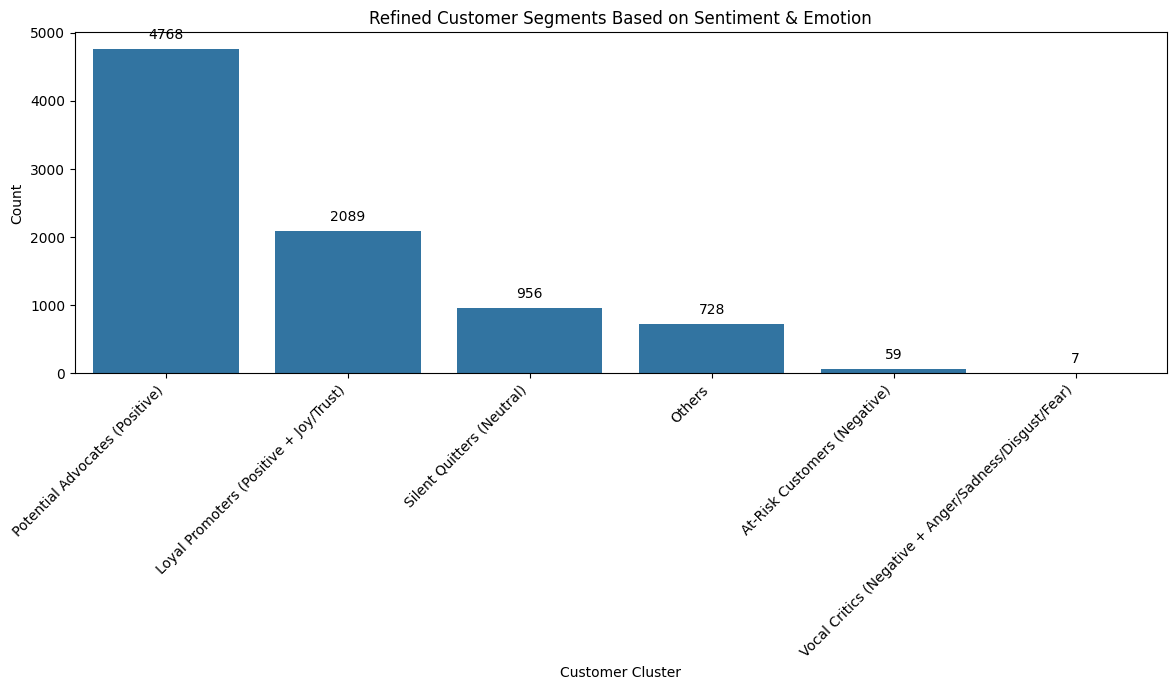

C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_13256\1425615916.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='viridis')


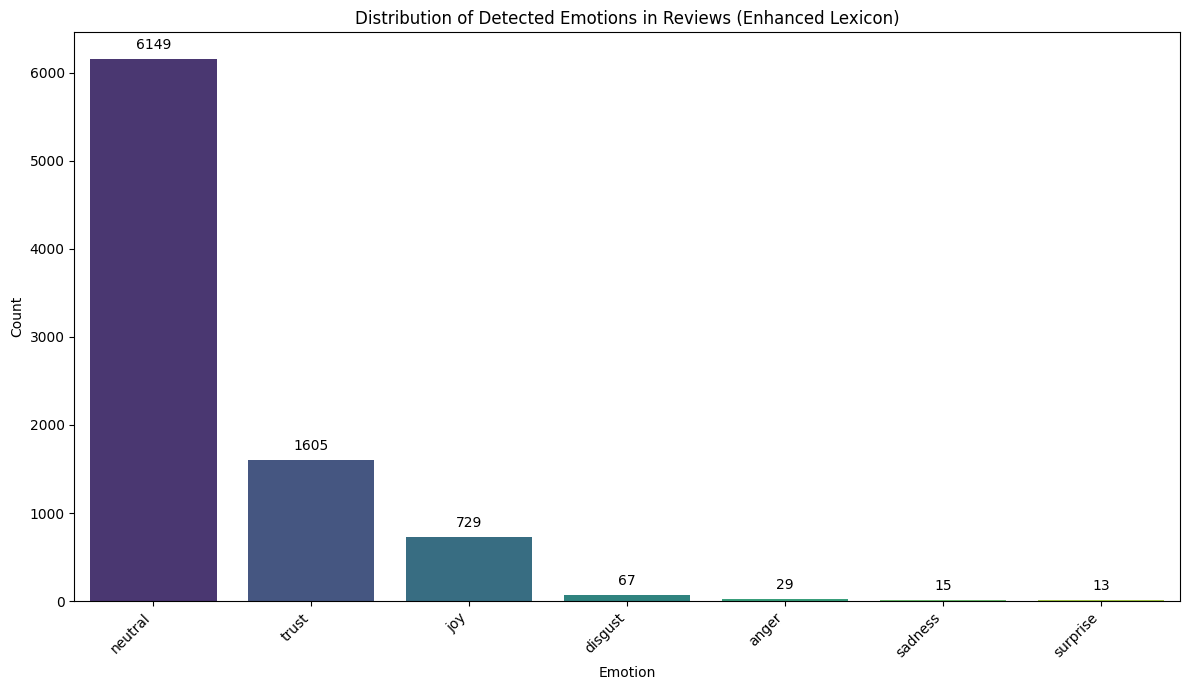

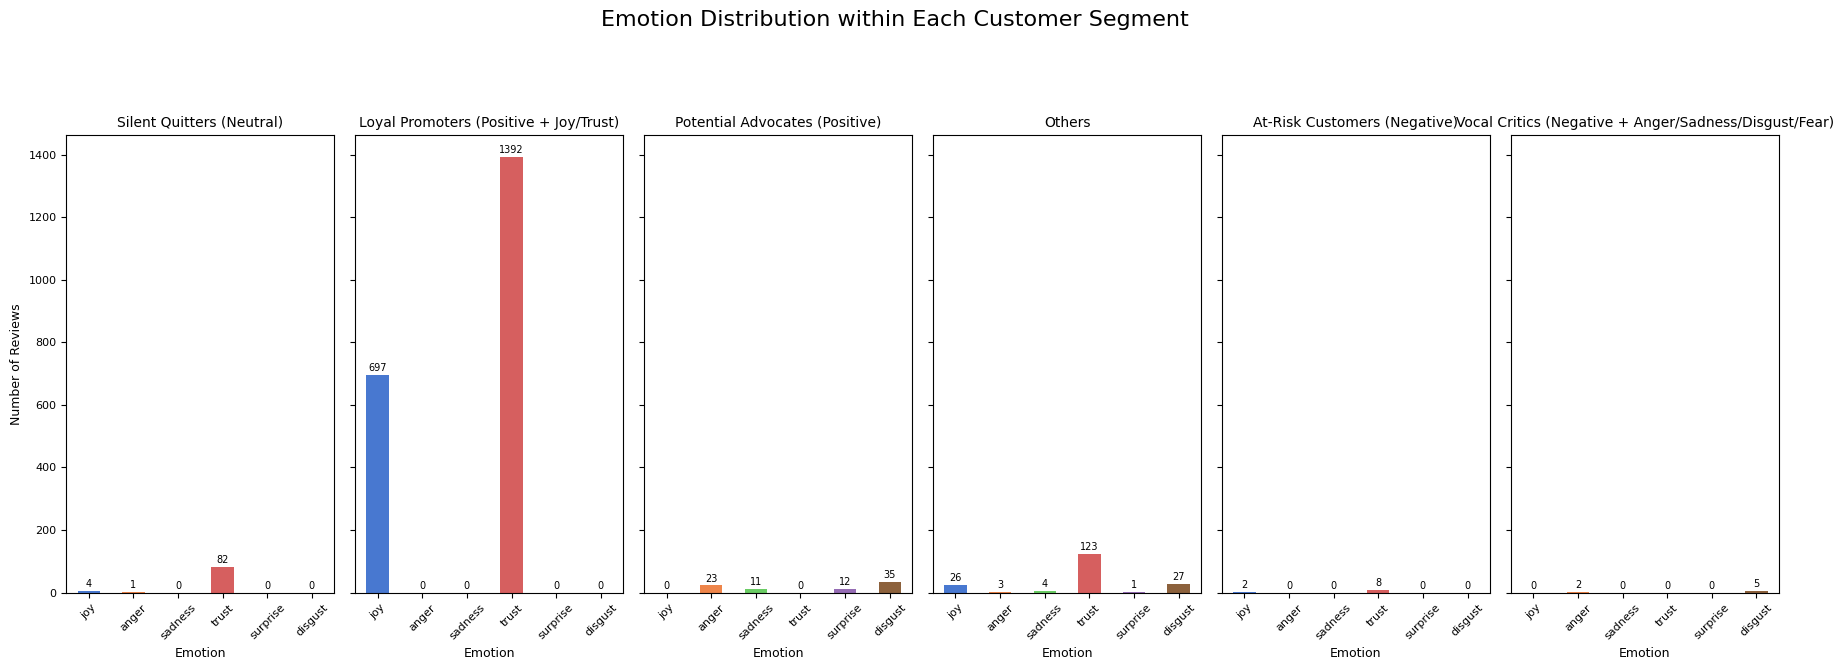

In [12]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from collections import defaultdict

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Step 2: Load the dataset (semicolon-separated)
df = pd.read_csv("C:\\Users\\Varshith M Gowda\\Desktop\\DATATHON\\df_asin_export_final2.csv", sep=';')


# Step 3: Basic cleanup
df = df[['reviewText', 'overall']]  # Keep relevant columns
df = df.dropna(subset=['reviewText'])  # Remove rows with no review text

# Step 4: Sentiment Analysis using VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(str(text))
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['reviewText'].apply(get_vader_sentiment)

# Step 5: Enhanced Emotion Detection using a more comprehensive lexicon
emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad']
}

def detect_emotion_enhanced(text):
    text = str(text).lower()
    emotions_found = defaultdict(int)
    for emotion, keywords in emotion_lexicon_enhanced.items():
        for word in keywords:
            if re.search(r'\b' + word + r'\b', text):
                emotions_found[emotion] += 1
    if emotions_found:
        # Return the emotion with the highest count if multiple are found
        return max(emotions_found, key=emotions_found.get)
    return 'neutral'

df['emotion'] = df['reviewText'].apply(detect_emotion_enhanced)

# Step 6: Customer Clustering (Refined based on task description)
def customer_cluster_refined(row):
    if row['overall'] >= 4 and row['vader_sentiment'] == 'positive' and row['emotion'] in ['joy', 'trust']:
        return 'Loyal Promoters (Positive + Joy/Trust)'
    elif row['overall'] <= 2 and row['vader_sentiment'] == 'negative' and row['emotion'] in ['anger', 'sadness', 'disgust', 'fear']:
        return 'Vocal Critics (Negative + Anger/Sadness/Disgust/Fear)'
    elif row['vader_sentiment'] == 'neutral':
        return 'Silent Quitters (Neutral)'
    elif row['overall'] >= 4 and row['vader_sentiment'] == 'positive':
        return 'Potential Advocates (Positive)'
    elif row['overall'] <= 2 and row['vader_sentiment'] == 'negative':
        return 'At-Risk Customers (Negative)'
    else:
        return 'Others'

df['customer_cluster_refined'] = df.apply(customer_cluster_refined, axis=1)

# Step 7: Feature-Based Emotion Analysis (Linking emotions to keywords/topics)
def analyze_emotions_by_feature(df, feature_keywords, emotion_column='emotion', review_column='reviewText'):
    feature_emotion_counts = defaultdict(lambda: defaultdict(int))
    for index, row in df.iterrows():
        review_text = str(row[review_column]).lower()
        emotion = row[emotion_column]
        for feature, keywords in feature_keywords.items():
            for keyword in keywords:
                if re.search(r'\b' + keyword + r'\b', review_text):
                    feature_emotion_counts[feature][emotion] += 1
    return pd.DataFrame.from_dict(feature_emotion_counts, orient='index').fillna(0)

# Example feature keywords (you'll need to customize these based on your product)
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
    # Add more features as you analyze your specific reviews
}

feature_emotion_df = analyze_emotions_by_feature(df, product_features_hdmi)
print("\nEmotion Breakdown by Product Feature:")
print(feature_emotion_df)


# Step 8: Visualization (Enhanced with quantity labels and separate bar charts for emotion by cluster)
def add_value_labels(ax, spacing=5):
    """Adds labels to the end of each bar in a bar chart."""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

plt.figure(figsize=(12, 7))
ax1 = sns.countplot(data=df, x='customer_cluster_refined', order=df['customer_cluster_refined'].value_counts().index)
plt.title('Refined Customer Segments Based on Sentiment & Emotion')
plt.xlabel('Customer Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
add_value_labels(ax1)
plt.tight_layout()
plt.show()

# Distribution of Enhanced Emotions
plt.figure(figsize=(12, 7))
ax2 = sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='viridis')
plt.title('Distribution of Detected Emotions in Reviews (Enhanced Lexicon)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
add_value_labels(ax2)
plt.tight_layout()
plt.show()

# Optional: Visualize Emotion Breakdown by Cluster (Separate Bar Charts with Adjusted Layout)
customer_clusters = df['customer_cluster_refined'].unique()
num_clusters = len(customer_clusters)
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(18, 7), sharey=True) # Increased figure height
fig.suptitle('Emotion Distribution within Each Customer Segment', fontsize=16)

for i, cluster in enumerate(customer_clusters):
    cluster_data = df[df['customer_cluster_refined'] == cluster]['emotion'].value_counts().reindex(emotion_lexicon_enhanced.keys(), fill_value=0)
    ax = axes[i]
    cluster_data.plot(kind='bar', ax=ax, color=sns.color_palette('muted'))
    ax.set_title(f'{cluster}', fontsize=10) # Reduced title fontsize
    ax.set_xlabel('Emotion', fontsize=9)
    if i == 0:
        ax.set_ylabel('Number of Reviews', fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=7, xytext=(0, 5), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # Further adjusted layout
plt.show()

# Step 9: Save detailed results
df.to_csv("emotion_clustered_reviews_detailed.csv", index=False)
feature_emotion_df.to_csv("feature_emotion_analysis.csv")

[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


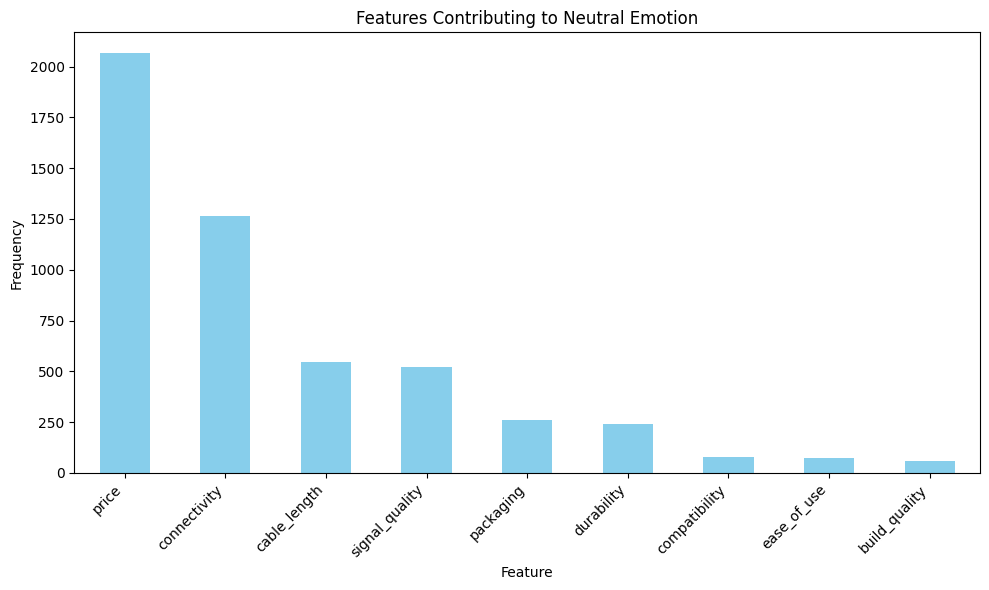

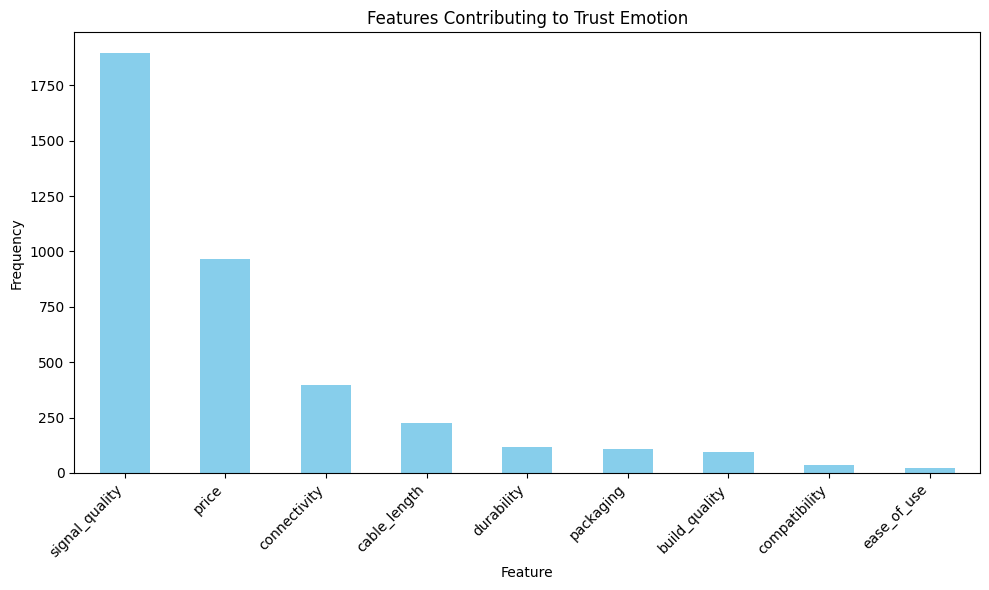

No 'feature' data to plot for nan emotion.


<Figure size 1000x600 with 0 Axes>

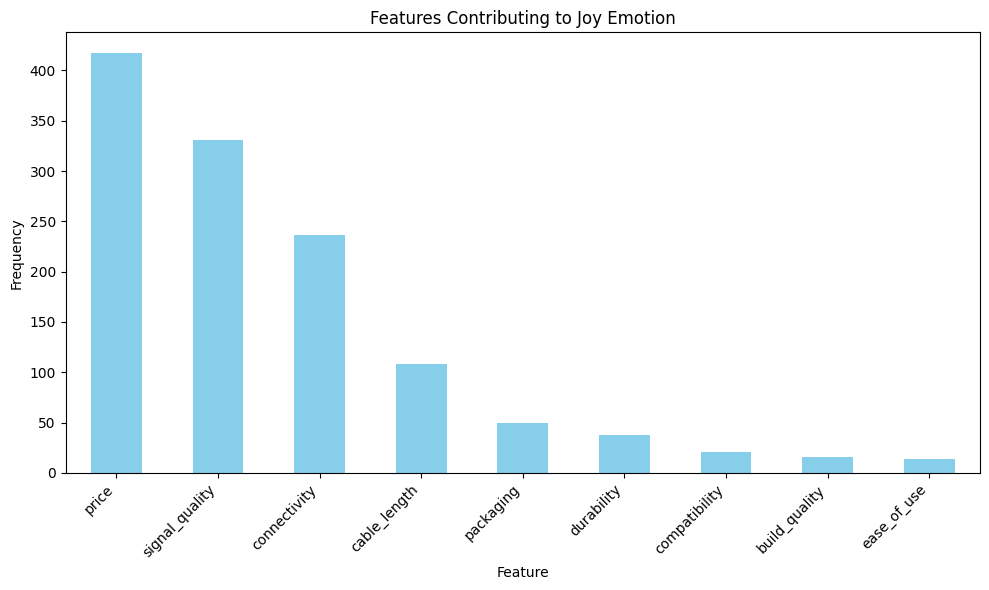

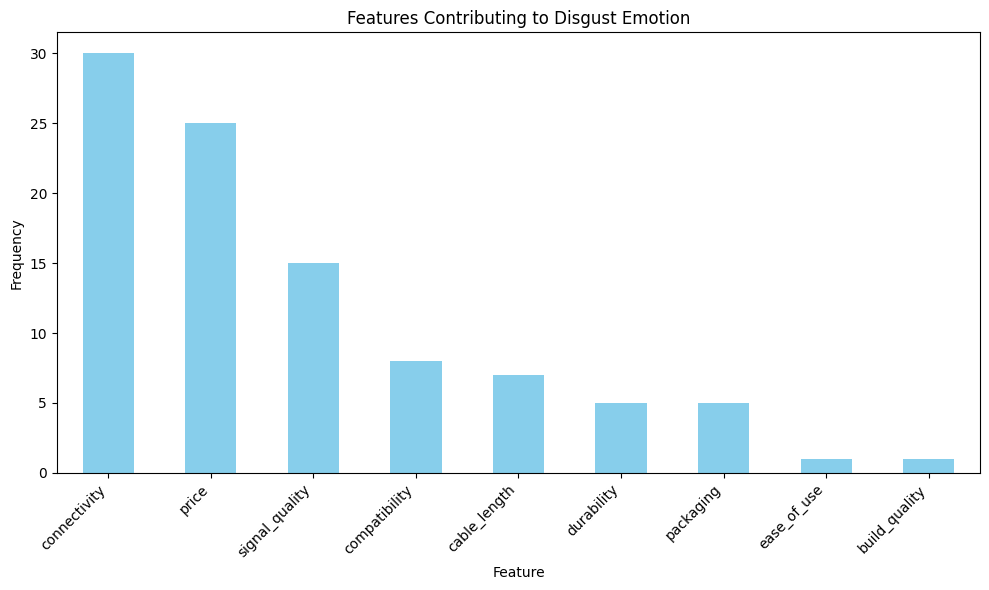

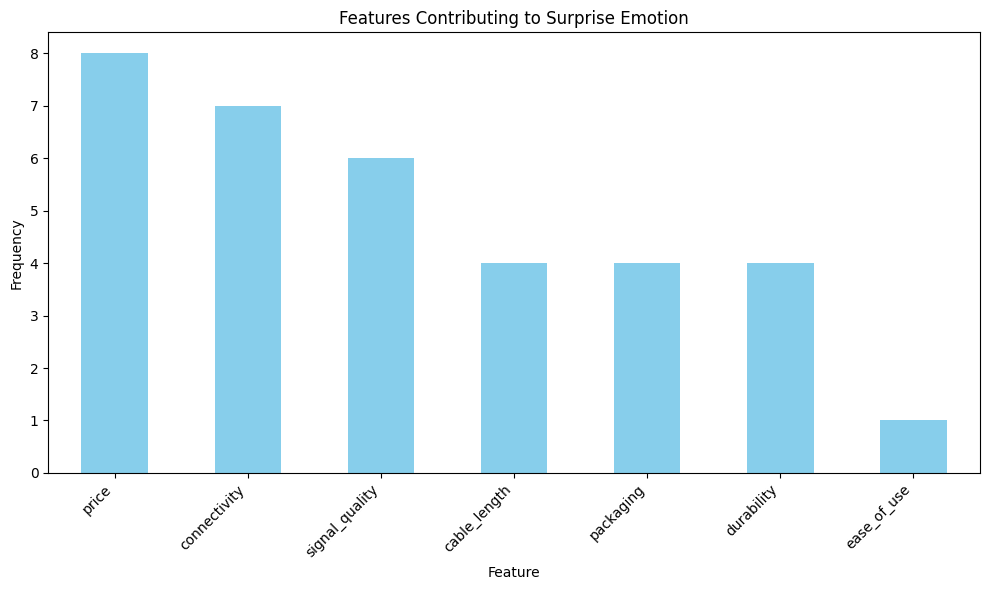

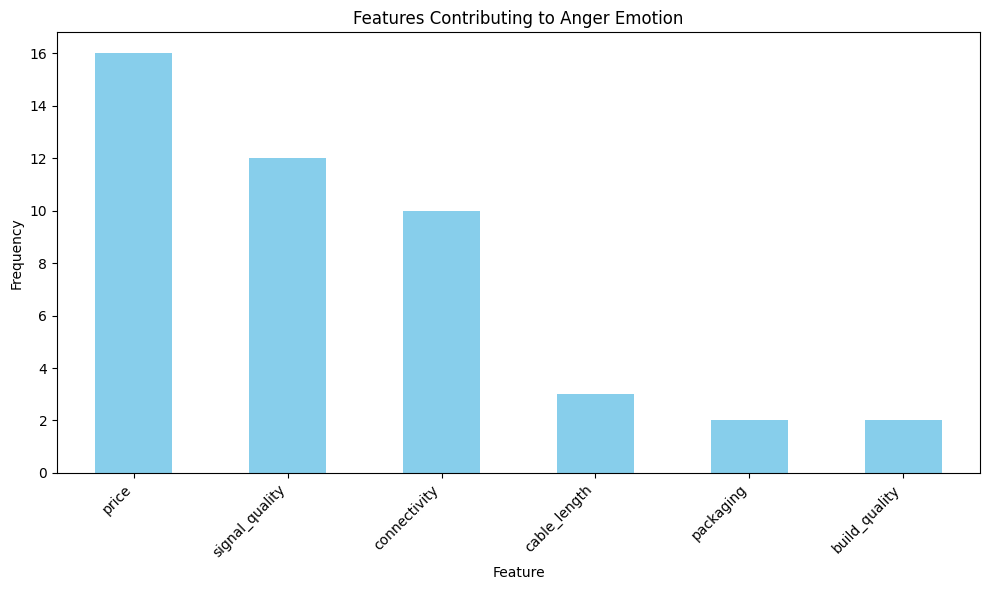

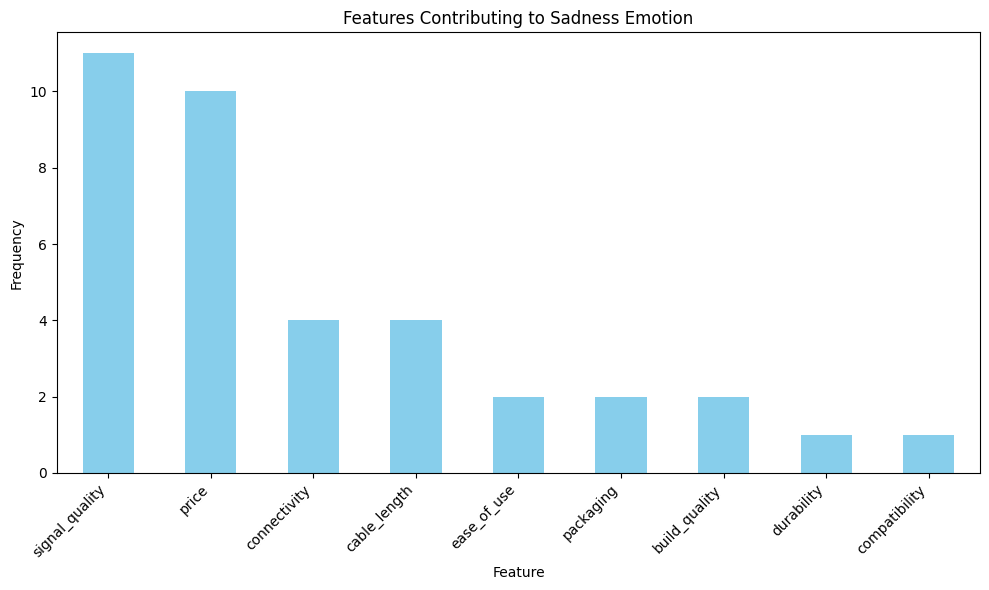

In [8]:
import pandas as pd
import nltk
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
nltk.download('punkt')
from nltk import word_tokenize, pos_tag, ne_chunk

# Step 1: Load the dataset (assuming you've saved the processed data)
df = pd.read_csv("emotion_clustered_reviews_detailed.csv")

# Step 2: Define HDMI Cable Features and Keywords (same as before)
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
    # Add more features as you analyze your specific reviews
}

emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad'],
    'neutral': []  # Crucially, include 'neutral'
}

# Step 3: Function to Extract Features and Emotions
def extract_feature_emotion_pairs(text, features, emotions):
    text = str(text).lower()
    feature_mentions = []
    emotion = 'neutral'  # Default emotion

    # Detect Emotion (Enhanced)
    emotions_found = defaultdict(int)
    for emo, keywords in emotions.items():
        for word in keywords:
            if re.search(r'\b' + word + r'\b', text):
                emotions_found[emo] += 1
    if emotions_found:
        emotion = max(emotions_found, key=emotions_found.get)

    # Detect Features
    for feature, keywords in features.items():
        for word in keywords:
            if re.search(r'\b' + word + r'\b', text):
                feature_mentions.append(feature)

    return list(zip(feature_mentions, [emotion] * len(feature_mentions)))


# Step 4: Apply the function to each review
df['feature_emotion_pairs'] = df['reviewText'].apply(lambda x: extract_feature_emotion_pairs(x, product_features_hdmi, emotion_lexicon_enhanced))

# Step 5:  Expand the DataFrame to have one row per feature-emotion pair
pairs_list = df['feature_emotion_pairs'].explode().dropna()  # Explode and drop NaNs
pairs_df = pd.DataFrame(pairs_list.tolist(), index=pairs_list.index, columns=['feature', 'emotion'])

# Fix: Rename the 'emotion' column in pairs_df to avoid the conflict
pairs_df = pairs_df.rename(columns={'emotion': 'emotion_pair'})

# Now join, using suffixes to distinguish the columns
df_expanded = df.join(pairs_df, rsuffix='_pairs')


# Step 6: Analyze and Plot Results

# 6.4: Plotting Feature Contributions to Each Emotion

for emotion in df_expanded['emotion_pair'].unique():
    plt.figure(figsize=(10, 6))
    emotion_df = df_expanded[df_expanded['emotion_pair'] == emotion]
    # Check if 'feature' column exists and has values before plotting
    if 'feature' in emotion_df.columns and not emotion_df['feature'].empty:
        feature_counts = emotion_df['feature'].value_counts()
        # Check if feature_counts is empty before plotting
        if not feature_counts.empty:
            feature_counts.plot(kind='bar', color='skyblue')
            plt.title(f'Features Contributing to {emotion.capitalize()} Emotion')
            plt.xlabel('Feature')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No feature counts to plot for {emotion} emotion.")
    else:
        print(f"No 'feature' data to plot for {emotion} emotion.")
        # -------------------------------------
# Generate & Save Top Complaint Tables
# -------------------------------------

# Top by frequency
top_freq = complaint_df.sort_values('Frequency', ascending=False).head(10)
top_freq.to_csv("top_complaints_by_frequency.csv")

# Top by most negative sentiment
top_severity = complaint_df.sort_values('AvgSentiment').head(10)
top_severity.to_csv("top_complaints_by_sentiment.csv")

# Top by emotional intensity
top_intensity = complaint_df.sort_values('EmotionalIntensity', ascending=False).head(10)
top_intensity.to_csv("top_complaints_by_intensity.csv")

# Composite top issues
top_issues.to_csv("top_complaints_by_composite_score.csv")

# Improvement suggestions
improvement_df.to_csv("suggested_product_improvements.csv", index=False)


In [3]:
import gzip
import json
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from collections import defaultdict

# Download VADER
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# ---- File Paths ----
review_file = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\Electronics_5.json.gz"
meta_file = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\meta_Electronics.json.gz"

# ---- Load HDMI Metadata & Identify Competitors ----
def load_hdmi_meta(meta_path, your_brand="AmazonBasics"):
    meta = []
    with gzip.open(meta_path, 'rt', encoding='utf-8', errors='ignore') as f:
        for line in f:
            try:
                item = json.loads(line)
                if 'asin' in item and 'brand' in item and 'category' in item:
                    if any('HDMI' in str(cat) for cat in item.get('category', [])):
                        meta.append(item)
            except:
                continue
    df = pd.DataFrame(meta).dropna(subset=['asin', 'brand'])
    
    # Normalize brand names
    df['brand'] = df['brand'].str.strip().str.lower()
    your_brand = your_brand.strip().lower()
    
    asin_to_brand = dict(zip(df['asin'], df['brand']))
    competitor_brands = df[df['brand'] != your_brand]['brand'].unique().tolist()

    print(f"✅ Found {len(competitor_brands)} competitors: {competitor_brands[:10]}")
    return asin_to_brand, competitor_brands, your_brand

# ---- Comparative Phrase Detection ----
comparative_patterns = [
    r"better than", r"worse than", r"as good as", r"not as good as",
    r"more reliable than", r"less reliable than", r"cheaper than", r"more expensive than"
]
comparison_regex = re.compile('|'.join(comparative_patterns), re.IGNORECASE)

# ---- Analyze Reviews for Comparative Insights ----
def extract_comparisons(review_path, asin_to_brand, competitors, your_brand="amazonbasics", sample_size=300000):
    comparisons = defaultdict(list)

    with gzip.open(review_path, 'rt', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if i >= sample_size:
                break
            try:
                review = json.loads(line)
                text = review.get("reviewText", "").lower()
                asin = review.get("asin", "")
                if asin not in asin_to_brand or not text:
                    continue

                brand = asin_to_brand[asin]
                if your_brand not in text and not any(b in text for b in competitors):
                    continue  # Skip if no brand mention

                if comparison_regex.search(text):
                    for competitor in competitors:
                        if competitor in text and your_brand in text:
                            sentiment = sia.polarity_scores(text)['compound']
                            comparisons[competitor].append(sentiment)
            except:
                continue

    return comparisons

# ---- Summarize Results ----
def summarize_comparisons(comparisons):
    rows = []
    for brand, sentiments in comparisons.items():
        if len(sentiments) >= 3:
            avg_sent = sum(sentiments) / len(sentiments)
            rows.append({
                "Competitor Brand": brand.title(),
                "Mentions": len(sentiments),
                "Avg Sentiment vs AmazonBasics": avg_sent
            })
    
    if not rows:
        print("⚠️ No valid comparative reviews found.")
        return pd.DataFrame()

    df = pd.DataFrame(rows)
    return df.sort_values("Avg Sentiment vs AmazonBasics", ascending=False)

# ---- Run the Pipeline ----
your_brand = "AmazonBasics"

print("📦 Loading HDMI metadata...")
asin_to_brand, competitors, your_brand = load_hdmi_meta(meta_file, your_brand)

print("\n🧠 Extracting comparative reviews...")
comparisons = extract_comparisons(review_file, asin_to_brand, competitors, your_brand)

print("\n📊 Generating summary...")
comparison_df = summarize_comparisons(comparisons)

if not comparison_df.empty:
    print(comparison_df.head(10))
    comparison_df.to_csv("amazonbasics_vs_competitors.csv", index=False)
else:
    print("🛑 No data to save.")


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


📦 Loading HDMI metadata...
✅ Found 1782 competitors: ['mhl tech', 'slimport', 'mhl', 'arkhill', 'le', 'mobile excess', 'samsung', 'monster', 'a days tech', 'adt']

🧠 Extracting comparative reviews...

📊 Generating summary...
⚠️ No valid comparative reviews found.
🛑 No data to save.


In [ ]:
import pandas as pd
import nltk
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Download resources
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Step 1: Load data
df = pd.read_csv("emotion_clustered_reviews_detailed.csv")

# Step 2: HDMI Features and Emotion Keywords
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
}

emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad'],
    'neutral': []
}

# Step 3: Extract feature-emotion pairs
def extract_feature_emotion_pairs(text, features, emotions):
    text = str(text).lower()
    feature_mentions = []
    emotion = 'neutral'

    # Emotion detection
    emotions_found = defaultdict(int)
    for emo, keywords in emotions.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                emotions_found[emo] += 1
    if emotions_found:
        emotion = max(emotions_found, key=emotions_found.get)

    # Feature detection
    for feature, keywords in features.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                feature_mentions.append(feature)

    return list(zip(feature_mentions, [emotion] * len(feature_mentions)))

# Step 4: Sentiment and Intensity
def get_sentiment_score(text):
    return sia.polarity_scores(str(text))['compound']

def get_emotion_intensity(text, emotion_keywords):
    text = str(text).lower()
    return sum([text.count(word) for words in emotion_keywords.values() for word in words])

df['sentiment'] = df['reviewText'].apply(get_sentiment_score)
df['emotion_intensity'] = df['reviewText'].apply(lambda x: get_emotion_intensity(x, emotion_lexicon_enhanced))

# Step 5: Extract feature-emotion pairs and expand
df['feature_emotion_pairs'] = df['reviewText'].apply(lambda x: extract_feature_emotion_pairs(x, product_features_hdmi, emotion_lexicon_enhanced))
pairs_exploded = df.explode('feature_emotion_pairs').dropna(subset=['feature_emotion_pairs'])

# Separate tuple into two columns
pairs_exploded[['feature', 'emotion_pair']] = pd.DataFrame(pairs_exploded['feature_emotion_pairs'].tolist(), index=pairs_exploded.index)

# Step 6: Focus on negative emotions
negative_emotions = ['anger', 'sadness', 'disgust']
negative_df = pairs_exploded[pairs_exploded['emotion_pair'].isin(negative_emotions)]

# Step 7: Complaint metrics
frequency_counts = negative_df['feature'].value_counts()
severity_scores = negative_df.groupby('feature')['sentiment'].mean()
intensity_scores = negative_df.groupby('feature')['emotion_intensity'].mean()

complaint_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'AvgSentiment': severity_scores,
    'EmotionalIntensity': intensity_scores
}).dropna()

# Normalize and rank
complaint_df['SeverityRank'] = complaint_df['AvgSentiment'].rank(ascending=True)
complaint_df['FrequencyRank'] = complaint_df['Frequency'].rank(ascending=False)
complaint_df['IntensityRank'] = complaint_df['EmotionalIntensity'].rank(ascending=False)

complaint_df['TotalScore'] = (
    0.4 * complaint_df['SeverityRank'] +
    0.3 * complaint_df['FrequencyRank'] +
    0.3 * complaint_df['IntensityRank']
)

# Final output
top_issues = complaint_df.sort_values('TotalScore', ascending=False).head(3)
print("🔧 Top 3 Issues to Fix First:")
print(top_issues[['Frequency', 'AvgSentiment', 'EmotionalIntensity', 'TotalScore']])

# Step 8: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_issues.reset_index(), x='feature', y='TotalScore', hue='feature', palette='Reds_r', legend=False)
plt.title('Top 3 Customer Complaints to Prioritize')
plt.xlabel('Feature')
plt.ylabel('Complaint Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\4217049203.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_sorted.reset_index(), x='feature', y='Frequency', palette='Reds')


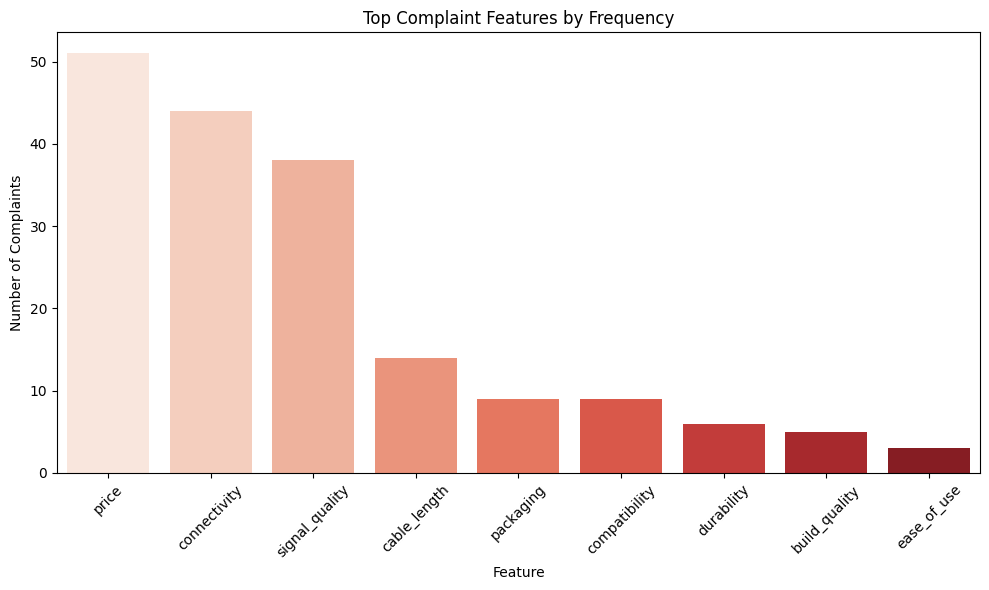

C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\4217049203.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_sorted.reset_index(), x='feature', y='AvgSentiment', palette='Blues_r')


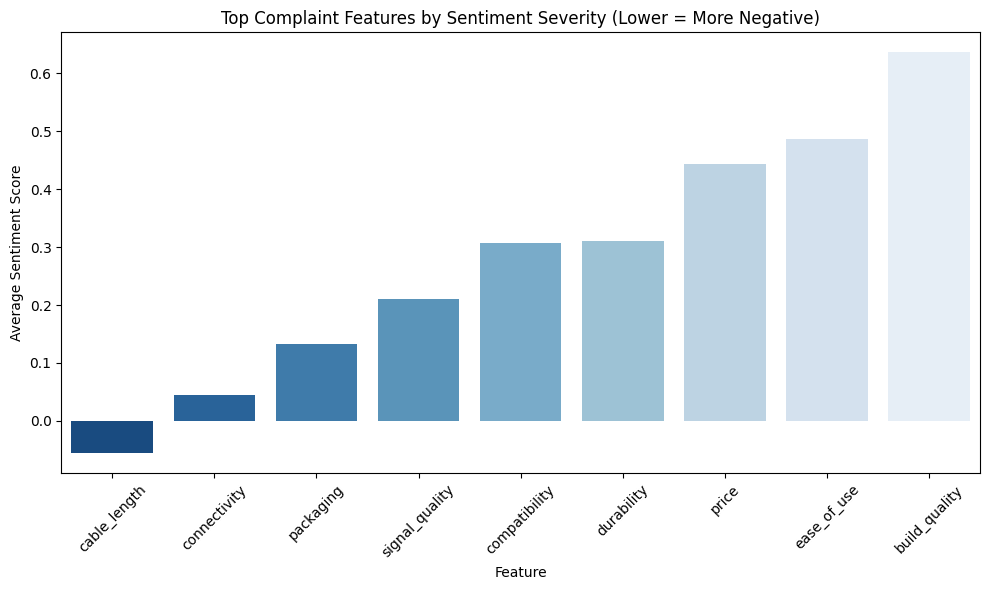

C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\4217049203.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intensity_sorted.reset_index(), x='feature', y='EmotionalIntensity', palette='Purples')


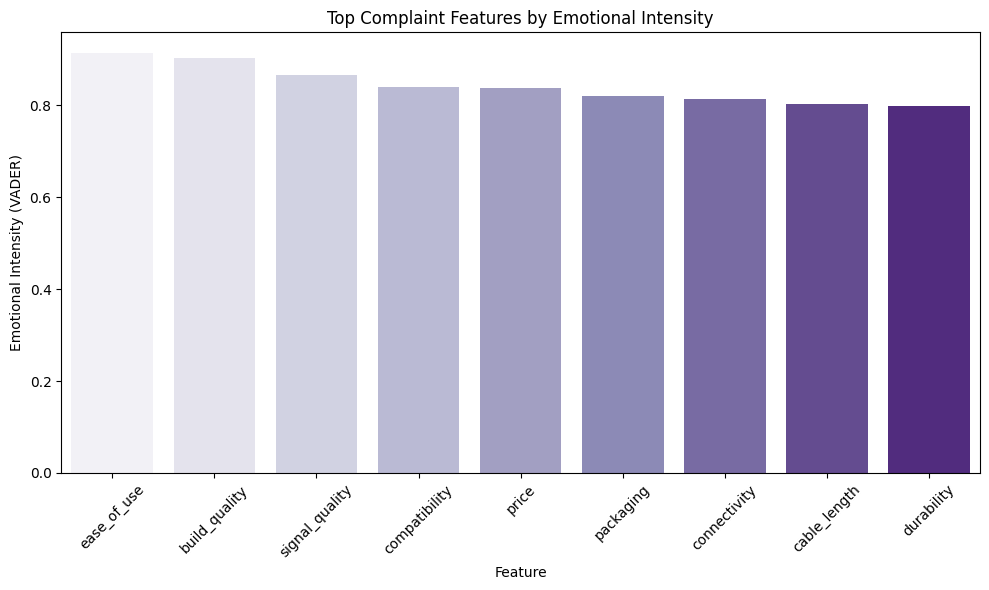

In [7]:
import pandas as pd
import nltk
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Downloads
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
from nltk import word_tokenize

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Load the dataset
df = pd.read_csv("emotion_clustered_reviews_detailed.csv")

# Step 2: Define HDMI Cable Features and Keywords
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
}

# Emotion Lexicon
emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad'],
    'neutral': []
}

# Step 3: Function to extract feature-emotion pairs
def extract_feature_emotion_pairs(text, features, emotions):
    text = str(text).lower()
    feature_mentions = []
    emotion = 'neutral'

    emotions_found = defaultdict(int)
    for emo, keywords in emotions.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                emotions_found[emo] += 1
    if emotions_found:
        emotion = max(emotions_found, key=emotions_found.get)

    for feature, keywords in features.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                feature_mentions.append(feature)

    return list(zip(feature_mentions, [emotion] * len(feature_mentions)))

# Step 4: Apply function to reviews
df['feature_emotion_pairs'] = df['reviewText'].apply(lambda x: extract_feature_emotion_pairs(x, product_features_hdmi, emotion_lexicon_enhanced))

# Step 5: Explode pairs into separate rows
pairs_list = df['feature_emotion_pairs'].explode().dropna()
pairs_df = pd.DataFrame(pairs_list.tolist(), index=pairs_list.index, columns=['feature', 'emotion_pair'])
df_expanded = df.join(pairs_df)

# Step 6: Add sentiment + intensity using VADER
df['sentiment'] = df['reviewText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['emotion_intensity'] = df['reviewText'].apply(lambda x: max(sia.polarity_scores(str(x)).values()))

# Merge into expanded df
df_expanded['sentiment'] = df_expanded.index.map(df['sentiment'])
df_expanded['emotion_intensity'] = df_expanded.index.map(df['emotion_intensity'])

# Step 7: Filter only negative emotions
negative_emotions = ['anger', 'sadness', 'disgust']
negative_df = df_expanded[df_expanded['emotion_pair'].isin(negative_emotions)]

# Step 8: Complaint metrics
frequency_counts = negative_df['feature'].value_counts()
severity_scores = negative_df.groupby('feature')['sentiment'].mean()
intensity_scores = negative_df.groupby('feature')['emotion_intensity'].mean()

# Combine into one DataFrame
complaint_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'AvgSentiment': severity_scores,
    'EmotionalIntensity': intensity_scores
}).dropna()

# Step 9: Sort for separate plots
freq_sorted = complaint_df.sort_values(by='Frequency', ascending=False).head(10)
sentiment_sorted = complaint_df.sort_values(by='AvgSentiment').head(10)
intensity_sorted = complaint_df.sort_values(by='EmotionalIntensity', ascending=False).head(10)

# Step 10: Plot 1 - Frequency
plt.figure(figsize=(10,6))
sns.barplot(data=freq_sorted.reset_index(), x='feature', y='Frequency', palette='Reds')
plt.title("Top Complaint Features by Frequency")
plt.xlabel("Feature")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2 - Sentiment Severity (lower = more negative)
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_sorted.reset_index(), x='feature', y='AvgSentiment', palette='Blues_r')
plt.title("Top Complaint Features by Sentiment Severity (Lower = More Negative)")
plt.xlabel("Feature")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3 - Emotional Intensity
plt.figure(figsize=(10,6))
sns.barplot(data=intensity_sorted.reset_index(), x='feature', y='EmotionalIntensity', palette='Purples')
plt.title("Top Complaint Features by Emotional Intensity")
plt.xlabel("Feature")
plt.ylabel("Emotional Intensity (VADER)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



📌 Suggested Product Improvements:

       Feature                                    Issue                                              Recommendation
    durability  High complaints with avg sentiment 0.31     Improve durability quality or address customer concerns
 build_quality  High complaints with avg sentiment 0.64  Improve build quality quality or address customer concerns
   ease_of_use  High complaints with avg sentiment 0.49    Improve ease of use quality or address customer concerns
     packaging  High complaints with avg sentiment 0.13      Improve packaging quality or address customer concerns
 compatibility  High complaints with avg sentiment 0.31  Improve compatibility quality or address customer concerns
         price  High complaints with avg sentiment 0.44          Improve price quality or address customer concerns
  cable_length High complaints with avg sentiment -0.06   Improve cable length quality or address customer concerns
  connectivity  High complaints with

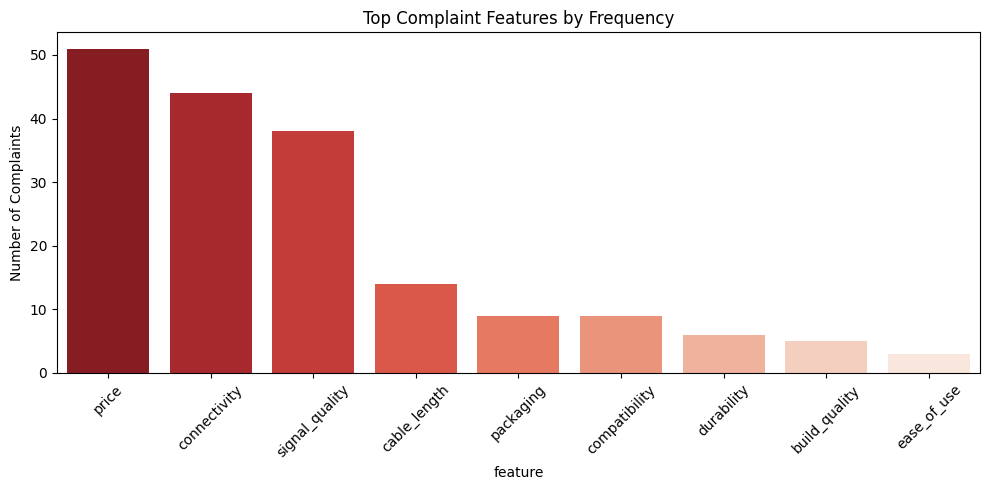

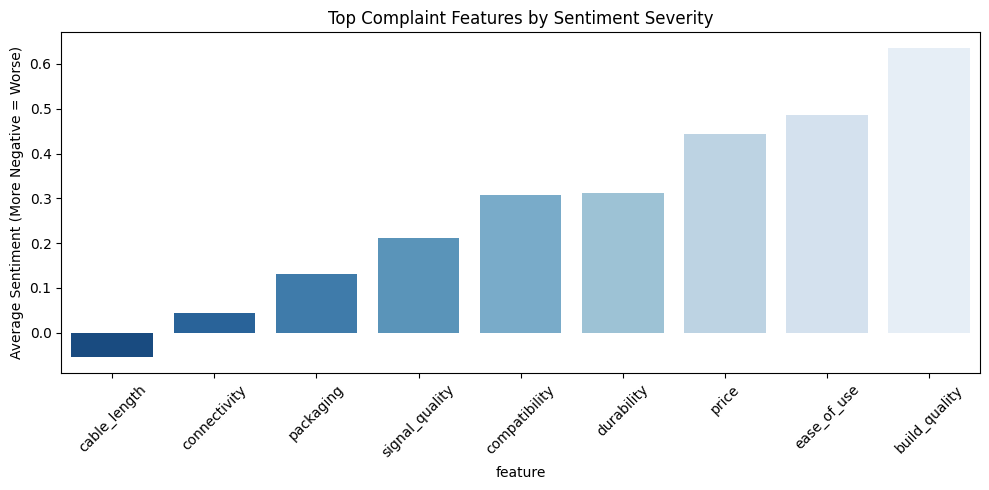

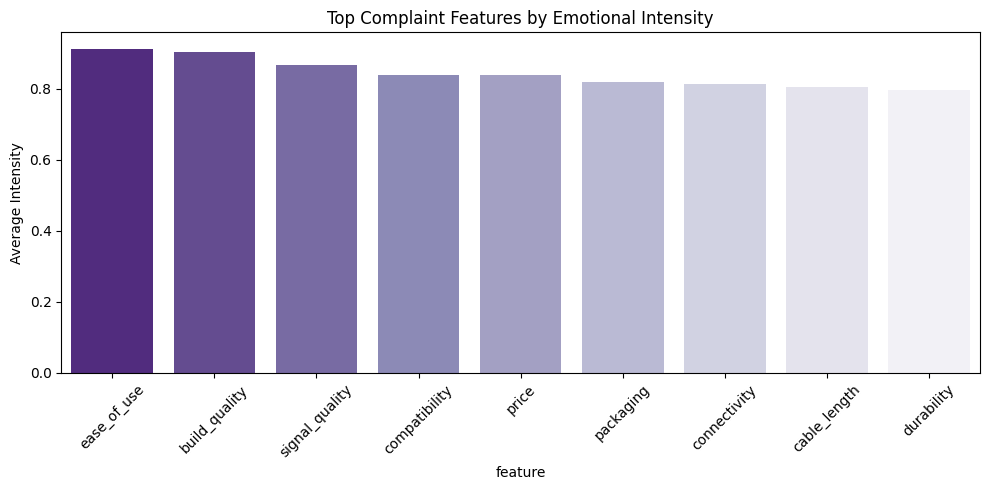

In [6]:
import pandas as pd
import nltk
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary resources
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load dataset
df = pd.read_csv("emotion_clustered_reviews_detailed.csv")

# Ensure sentiment & intensity exist, or compute them
if 'sentiment' not in df.columns or 'emotion_intensity' not in df.columns:
    df['sentiment'] = df['reviewText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
    df['emotion_intensity'] = df['reviewText'].apply(
        lambda x: max(sia.polarity_scores(str(x)).values()) if isinstance(x, str) else 0
    )

# Define HDMI cable features
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
}

# Enhanced emotion lexicon
emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad'],
    'neutral': []
}

# Extract feature-emotion pairs
def extract_feature_emotion_pairs(text, features, emotions):
    text = str(text).lower()
    feature_mentions = []
    emotion = 'neutral'
    emotions_found = defaultdict(int)

    for emo, keywords in emotions.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                emotions_found[emo] += 1
    if emotions_found:
        emotion = max(emotions_found, key=emotions_found.get)

    for feature, keywords in features.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                feature_mentions.append(feature)

    return list(zip(feature_mentions, [emotion] * len(feature_mentions)))

# Apply extraction
df['feature_emotion_pairs'] = df['reviewText'].apply(
    lambda x: extract_feature_emotion_pairs(x, product_features_hdmi, emotion_lexicon_enhanced)
)

# Explode pairs
pairs_list = df['feature_emotion_pairs'].explode().dropna()
pairs_df = pd.DataFrame(pairs_list.tolist(), index=pairs_list.index, columns=['feature', 'extracted_emotion'])

# Join safely
df_expanded = df.join(pairs_df)

# Filter for negative emotions
negative_emotions = ['anger', 'sadness', 'disgust']
negative_df = df_expanded[df_expanded['extracted_emotion'].isin(negative_emotions)].dropna(subset=['feature'])

# Score complaints
frequency_counts = negative_df['feature'].value_counts()
severity_scores = negative_df.groupby('feature')['sentiment'].mean()
intensity_scores = negative_df.groupby('feature')['emotion_intensity'].mean()

complaint_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'AvgSentiment': severity_scores,
    'EmotionalIntensity': intensity_scores
}).dropna()

# Composite score
complaint_df['SeverityScore'] = -complaint_df['AvgSentiment']
complaint_df['TotalScore'] = (
    complaint_df['Frequency'].rank(ascending=False) +
    complaint_df['SeverityScore'].rank(ascending=False) +
    complaint_df['EmotionalIntensity'].rank(ascending=False)
)

# Top issues
top_issues = complaint_df.sort_values('TotalScore', ascending=False).head(10)

# Suggestions
improvement_plan = []
for feature, row in top_issues.iterrows():
    improvement_plan.append({
        'Feature': feature,
        'Issue': f"High complaints with avg sentiment {row['AvgSentiment']:.2f}",
        'Recommendation': f"Improve {feature.replace('_', ' ')} quality or address customer concerns"
    })

improvement_df = pd.DataFrame(improvement_plan)
print("\n📌 Suggested Product Improvements:\n")
print(improvement_df.to_string(index=False))

# Visualization 1: Frequency
plt.figure(figsize=(10, 5))
top_freq = complaint_df.sort_values('Frequency', ascending=False).head(10)
sns.barplot(data=top_freq.reset_index(), x='feature', y='Frequency', hue='feature', palette='Reds_r', legend=False)
plt.title("Top Complaint Features by Frequency")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization 2: Sentiment severity
plt.figure(figsize=(10, 5))
top_severity = complaint_df.sort_values('AvgSentiment').head(10)
sns.barplot(data=top_severity.reset_index(), x='feature', y='AvgSentiment', hue='feature', palette='Blues_r', legend=False)
plt.title("Top Complaint Features by Sentiment Severity")
plt.ylabel("Average Sentiment (More Negative = Worse)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization 3: Emotional intensity
plt.figure(figsize=(10, 5))
top_intensity = complaint_df.sort_values('EmotionalIntensity', ascending=False).head(10)
sns.barplot(data=top_intensity.reset_index(), x='feature', y='EmotionalIntensity', hue='feature', palette='Purples_r', legend=False)
plt.title("Top Complaint Features by Emotional Intensity")
plt.ylabel("Average Intensity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



[nltk_data] Downloading package vader_lexicon to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Varshith M
[nltk_data]     Gowda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\1441481878.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_top3.reset_index(), x='feature', y='Frequency', palette='Reds')


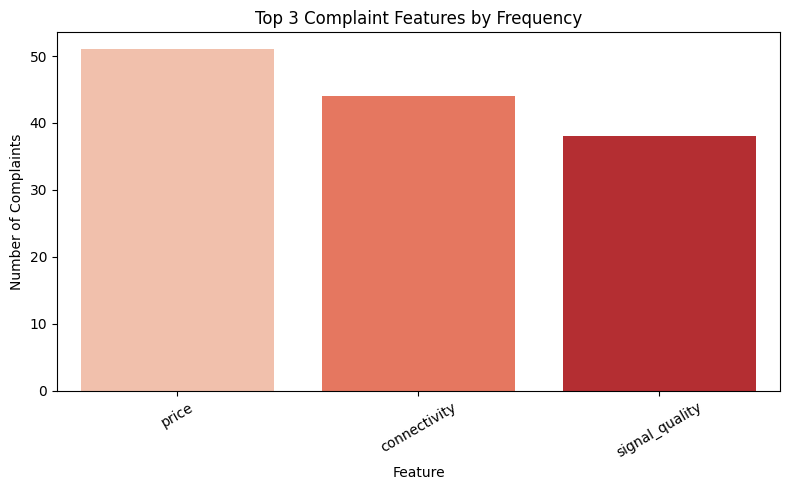

C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\1441481878.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_top3.reset_index(), x='feature', y='AvgSentiment', palette='Blues_r')


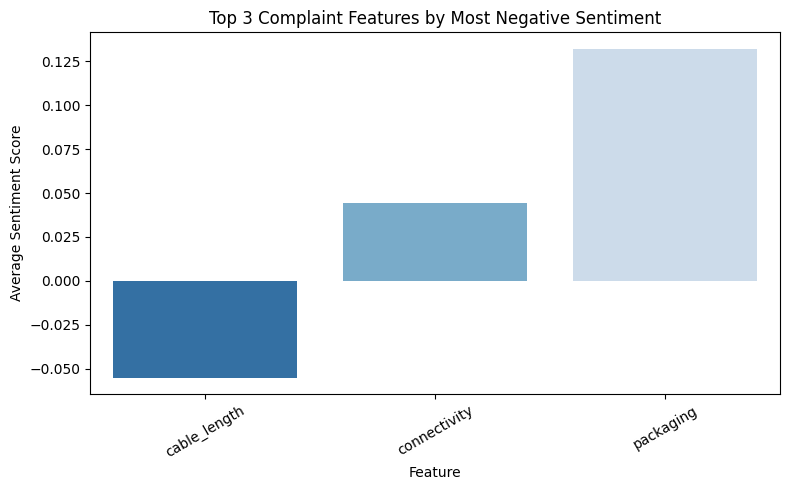

C:\Users\Varshith M Gowda\AppData\Local\Temp\ipykernel_21128\1441481878.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intensity_top3.reset_index(), x='feature', y='EmotionalIntensity', palette='Purples')


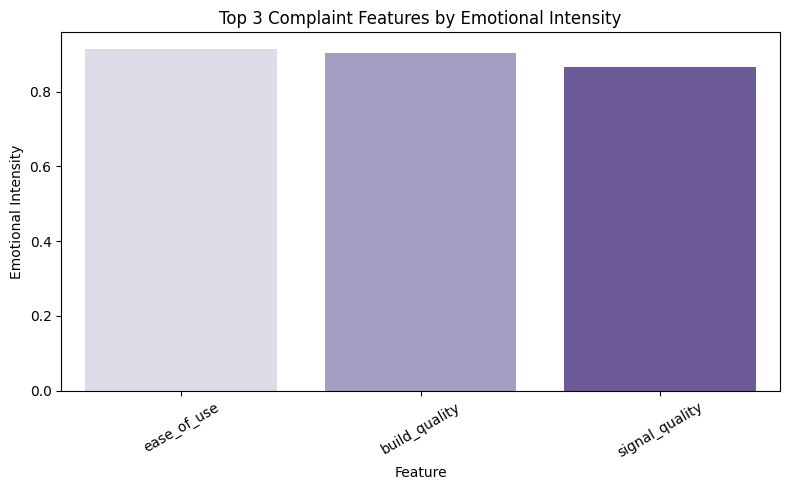

In [5]:
import pandas as pd
import nltk
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Downloads
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Load dataset
df = pd.read_csv("emotion_clustered_reviews_detailed.csv")

# Define product features
product_features_hdmi = {
    'connectivity': ['connect', 'connection', 'plug', 'unplug', 'port', 'device', 'tv', 'monitor', 'console', 'receiver'],
    'signal_quality': ['quality', 'resolution', 'hdr', '4k', '8k', 'picture', 'image', 'video', 'clarity', 'sharpness', 'signal', 'transmission', 'bandwidth'],
    'durability': ['durable', 'sturdy', 'strong', 'lasting', 'fray', 'break', 'bent', 'damage', 'material', 'shielding'],
    'cable_length': ['length', 'foot', 'meter', 'long', 'short'],
    'price': ['price', 'cost', 'expensive', 'cheap', 'value', 'affordable', 'worth'],
    'compatibility': ['compatible', 'works with', 'supports', 'version', 'hdmi 2.0', 'hdmi 2.1', 'cec', 'arc'],
    'ease_of_use': ['easy to use', 'simple', 'convenient', 'plug and play'],
    'build_quality': ['build', 'construction', 'connector', 'gold-plated'],
    'packaging': ['packaging', 'box', 'arrive', 'delivered', 'protected']
}

# Define emotions
emotion_lexicon_enhanced = {
    'joy': ['happy', 'joyful', 'delighted', 'pleased', 'glad', 'love', 'amazing', 'fantastic', 'wonderful', 'excited', 'thrilled', 'satisfied'],
    'anger': ['angry', 'mad', 'furious', 'annoyed', 'irritated', 'hate', 'frustrated', 'disappointed', 'outraged', 'unhappy'],
    'sadness': ['sad', 'unhappy', 'disappointed', 'upset', 'depressed', 'miserable', 'grief', 'sorrow', 'regret'],
    'trust': ['trust', 'reliable', 'dependable', 'secure', 'safe', 'confident', 'believe', 'assured', 'quality', 'stable'],
    'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'unexpected'],
    'disgust': ['disgust', 'disgusting', 'revolting', 'nasty', 'unpleasant', 'awful', 'poor', 'bad'],
    'neutral': []
}

# Feature-emotion extractor
def extract_feature_emotion_pairs(text, features, emotions):
    text = str(text).lower()
    feature_mentions = []
    emotion = 'neutral'
    emotions_found = defaultdict(int)
    for emo, keywords in emotions.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                emotions_found[emo] += 1
    if emotions_found:
        emotion = max(emotions_found, key=emotions_found.get)
    for feature, keywords in features.items():
        for word in keywords:
            if re.search(r'\b' + re.escape(word) + r'\b', text):
                feature_mentions.append(feature)
    return list(zip(feature_mentions, [emotion] * len(feature_mentions)))

# Apply extraction
df['feature_emotion_pairs'] = df['reviewText'].apply(lambda x: extract_feature_emotion_pairs(x, product_features_hdmi, emotion_lexicon_enhanced))

# Expand into rows
pairs_list = df['feature_emotion_pairs'].explode().dropna()
pairs_df = pd.DataFrame(pairs_list.tolist(), index=pairs_list.index, columns=['feature', 'emotion_pair'])
df_expanded = df.join(pairs_df)

# Add sentiment & intensity
df['sentiment'] = df['reviewText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['emotion_intensity'] = df['reviewText'].apply(lambda x: max(sia.polarity_scores(str(x)).values()))
df_expanded['sentiment'] = df_expanded.index.map(df['sentiment'])
df_expanded['emotion_intensity'] = df_expanded.index.map(df['emotion_intensity'])

# Filter negative emotions
negative_emotions = ['anger', 'sadness', 'disgust']
negative_df = df_expanded[df_expanded['emotion_pair'].isin(negative_emotions)]

# Complaint metrics
frequency_counts = negative_df['feature'].value_counts()
severity_scores = negative_df.groupby('feature')['sentiment'].mean()
intensity_scores = negative_df.groupby('feature')['emotion_intensity'].mean()

complaint_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'AvgSentiment': severity_scores,
    'EmotionalIntensity': intensity_scores
}).dropna()

# Get top 3 for each plot
freq_top3 = complaint_df.sort_values(by='Frequency', ascending=False).head(3)
sentiment_top3 = complaint_df.sort_values(by='AvgSentiment').head(3)
intensity_top3 = complaint_df.sort_values(by='EmotionalIntensity', ascending=False).head(3)

# Plot 1 - Top 3 by Frequency
plt.figure(figsize=(8,5))
sns.barplot(data=freq_top3.reset_index(), x='feature', y='Frequency', palette='Reds')
plt.title("Top 3 Complaint Features by Frequency")
plt.xlabel("Feature")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot 2 - Top 3 by Negative Sentiment
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_top3.reset_index(), x='feature', y='AvgSentiment', palette='Blues_r')
plt.title("Top 3 Complaint Features by Most Negative Sentiment")
plt.xlabel("Feature")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot 3 - Top 3 by Emotional Intensity
plt.figure(figsize=(8,5))
sns.barplot(data=intensity_top3.reset_index(), x='feature', y='EmotionalIntensity', palette='Purples')
plt.title("Top 3 Complaint Features by Emotional Intensity")
plt.xlabel("Feature")
plt.ylabel("Emotional Intensity")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [5]:
import gzip
import json

# Path to the metadata file
meta_file = r"C:\Users\Varshith M Gowda\Desktop\DATATHON\meta_Electronics.json.gz"

# Normalize for comparison
target_brand = "bluerigger"
mention_count = 0

with gzip.open(meta_file, 'rt', encoding='utf-8', errors='ignore') as f:
    for line in f:
        try:
            item = json.loads(line)
            brand = item.get("brand", "").strip().lower()
            if brand == target_brand:
                mention_count += 1
        except:
            continue

print(f"✅ Brand 'Monster' found {mention_count} times in metadata.")


✅ Brand 'Monster' found 65 times in metadata.
